# Alternus Vera

##  Alternus Vera - Fake News Detection - Seekers


#### - Course Code: CMPE-257 
#### - Group name: Seekers


#### Business Problem

What is Fake News?

- The term ‘Fake news’ is mostly used to describe completely fabricated stories that is deliberately misleading.
- Fake News detection involves assessing the quality of the content given to understand whether what you are seeing is true or not.

Project objective:

The widespread propagation of false information online is not a recent phenomenon but its perceived impact in the 2016 U.S. presidential election has thrust the issue into the spotlight. Technology companies are already exploring machine learning-based approaches for solving the problem. In this project, we are using NLP based text classification to identify the different news categories.


#### Top Features Selected

Important Features identified from the Fake news article:

List of Factors identified by reading “Fake News Detection on Social Media: A Data Mining Perspective” 

1.  Political affiliation
2.  Sentimental Analysis
3.  Topic features – That can be extracted using models like LDA
4.  Post/Social media activities based: People express their emotions or opinions towards fake news through social media posts.
5.  Visual based: Fake news detection based on images and video links features in the dataset.
6.	Linguistic based: Fake news detection based on Sensationalism and writing style (features: Article title and text)
7.	Reliable source: Fake news detection based on the source of the article.
8.	Authenticity: Fake news includes false information that can be verified as such.
9.	Intent: Fake news is created with dishonest intention to mislead consumers
10.	Confirmation Bias: consumers prefer to receive information that confirms their existing views
11.	Psychology utility: receiving news that satisfies their prior opinions and social needs
12.	Social credibility: which means people are more likely to perceive a source as credible if others perceive the source is credible
13.	 Frequency heuristic: means that consumers may naturally favor information they hear frequently, even if its fake
14.	 Credibility and Reliability: based on registration age, number of followers/followees, number of tweets the uer has authored.
15.	 Stance features (also called viewpoints) – indicate the user’s opinion about the news such a supporting or denying. 
16.	 Credibility – for the posts access the degree of reliability
17.	 Echo Chamber – users on social media tend to form groups containing like-minded people where they then polarize their opinions, resulting in an echo chamber effect. 
18.	 Sensationalism 
19.	 Location / Geography 
20.	 Education 
21.	 Gender 
22.	 User based: malicious account, names, comments, likes.
23.	 Naive Realism: consumers tend to believe that their perceptions of reality are the only accurate views, while others who disagree are regarded as uninformed, irrational or biased.
24.	 Network based: users form different networks on social media in terms of interests, topics and relations. 
25.	 Style based: capturing the manipulators in the writing style of news content.
26.	 Short-term utility: the incentive to maximize profit, which is positively correlated with the number of consumers reached; 
27.	 Long term utility: their reputation in terms of news authenticity. Utility of consumers consists of two parts: (i)  Information utility: obtaining true and unbiased information (usually extra investment cost needed); 
(ii) Psychology utility: receiving news that satisfies their prior opinions and social needs, e.g., confirmation bias and prospect theory. 


#### Dataset used for the Project – Kaggle dataset for Fake news
https://www.kaggle.com/mrisdal/fake-news/version/1#fake.csv

The dataset considered for Alternus Vera project is “Getting real about fake news” from Kaggle. This dataset contains text and metadata from fake and biased news sources from the web. The data obtained was in csv file and contains 12999 samples. Each sample corresponds to a news article with text, title, author, language, type and many more features. 

The features or columns in the Kaggle fake news dataset are listed below:
- uuid - Unique identifier
- ord_in_thread – author of story
- published - date published
- title - title of the story
- text - text of story
- language - data from webhose.io
- crawled - date the story was archived
- site_url - site URL from BS detector
- country - data from webhose.io
- domain_rank - data from webhose.io
- thread_title
- spam_score - data from webhose.io
- main_img_url - image from story
- replies_count - number of replies
- participants_count - number of participants
- likes - number of Facebook likes
- comments - number of Facebook comments
- shares - number of Facebook shares
- type - type of website (label from BS detector)


## Important factors(topics) considered for the project and contributions:
<br />

<b>
1.   Political Affiliation - Ashwini Shankar Narayan <br />
2.   Sentimental Analysis - Nidhi Jamar <br />
3.   Topic features LDA - Anuradha Rajshekar <br />
4.   Social media activities - Sindhu Goudru Shivanandappa Patil
</b>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.feature_extraction import stop_words
from tqdm import tqdm
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial

### Dataset parsing and pre-processing

Following are the steps followed in the work done to perform data pre-processing with respect to extracting the features related political affiliation in the dataset.
- Removing rows with text column equals to null. This is important because text columns with null values has no importance in our work.
- Perform tokenization and filter out Stop words. Tokenization is the step which splits longer strings of text into smaller pieces, or tokens. And, removing stop words basically includes filtering the texts that may contain stop words like 'the', 'is', 'are'. 
- Eliminate extra spaces in the text. 
- Filtering special characters and convert entire text to lower case.

#### Parse the fake news dataset and check for any empty columns

In [2]:
data = pd.read_csv('./fake.csv')
pd.isnull(data).sum()


uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

#### Remove any text which is NAN or null

In [3]:
data = data[data['text'].notnull()]
pd.isnull(data).sum()

uuid                     0
ord_in_thread            0
author                2378
published                0
title                  680
text                     0
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3597
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

#### Tokenisation and Remove Stop Words 

In [4]:
#Tokenisation and pre-processing by removing stop words, special characters and convert to lower case
def parse_txt(txt):
    review = re.sub('[^a-zA-Z]', ' ', txt) 
    review = review.lower().split()
    review = [word for word in review if not word in stop_words.ENGLISH_STOP_WORDS]
    review = [word for word in review if len(word)>2]
    review = ' '.join(review)
    return review
data['processed_text'] = [parse_txt(row) for row in tqdm(data['text'])]
print('Unprocessed text : {} '.format(data['text'][0]))
print('\n\n Processed text : {} '.format(data['processed_text'][0]))
data.head(10)

100%|██████████| 12953/12953 [00:06<00:00, 2045.32it/s]


Unprocessed text : Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? 
Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! 
We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related 


 Processed text : print pay money plus entire family came need deported asap did years bust group stealing government taxpayers group somalis stole million government benefits just months reported numerous cases like muslim refugees immigrants commit fraud scamming way control related 


uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   
5  8f30f5ea14c9d5914a9fe4f55ab2581772af4c31              0   
6  d3cc0fe38f41a59f7c48f8c3528ca5f74193148f              0   
7  b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4              0   
8  a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6              0   
9  f54d8e13010d0a79893995ee65360ad4b38b5a35              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   
5     Barracuda Brigade  2016-11-02T16:31:28.550+02:00   
6                Fed Up  2016-11-04T19:40:00.000+02:00   
7                Fed Up  2016-11-05T01:19:00.000+02:00   
8                Fed Up  2016-11-06T23:54:00.000+02:00   
9                Fed Up  2016-11-07T02:43:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   
5  Hillary Goes Absolutely Berserk On Protester A...   
6  BREAKING! NYPD Ready To Make Arrests In Weiner...   
7  WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...   
8  BREAKING: CLINTON CLEARED...Was This A Coordin...   
9  EVIL HILLARY SUPPORTERS Yell "F*ck Trump"…Burn...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \nFox News Sunday reported this mo...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   
5  Print Hillary goes absolutely berserk! She exp...  english   
6  BREAKING! NYPD Ready To Make Arrests In Weiner...  english   
7  BREAKING! NYPD Ready To Make Arrests In Weiner...  english   
8  \nLimbaugh said that the revelations in the Wi...  english   
9  Email \nThese people are sick and evil. They w...  english   

                         crawled             site_url country  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US   
5  2016-11-02T16:31:28.550+02:00  100percentfedup.com      US   
6  2016-11-05T02:13:46.065+02:00  100percentfedup.com      US   
7  2016-11-05T05:59:07.458+02:00  100percentfedup.com      US   
8  2016-11-07T10:20:06.409+02:00  100percentfedup.com      US   
9  2016-11-07T10:20:27.252+02:00  100percentfedup.com      US   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           
5                        ...                           
6                        ...                           
7                        ...                           
8                        ...                           
9                        ...                           

                                        thread_titl

### Visualisation on Article types

#### Identify unique "type" column and its counts

In [5]:
#Consider the type feature from the dataset to perform LDA in further step
y = data.type.value_counts()
print(y)

bs            11492
bias            443
conspiracy      430
hate            246
state           121
junksci         102
satire          100
fake             19
Name: type, dtype: int64


#### Visualizing "Type" column and its counts

Types with the BS category.


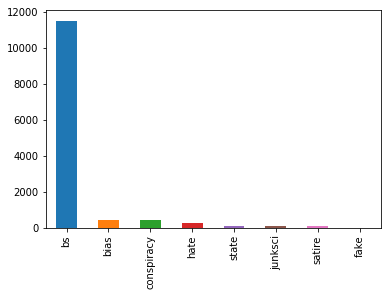

In [6]:
print('Types with the BS category.')
pd.value_counts(data['type']).plot.bar()

#### Visualizing "Type" column excluding "bs" type and their counts 

Types without the BS category.


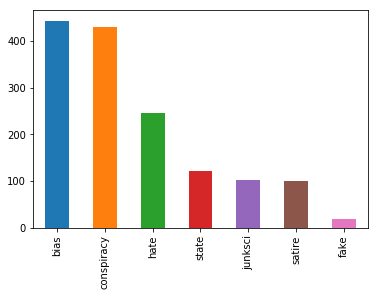

In [7]:
filtered = data[data['type']!='bs']
# filtered = data
print('Types without the BS category.')
pd.value_counts(data[data['type']!='bs']['type']).plot.bar()

#### Print filtered data

In [8]:
p_data = filtered
print(p_data.shape)
p_data.head(5)

(1461, 21)


uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \nFox News Sunday reported this mo...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   

                         crawled             site_url country  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                        thread_title spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...      0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...      0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...      0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...      0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...      0.865   

                                        main_img_url replies_count  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...             0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...             0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...             0   
3  http://100percentfedup.com/wp-content/uploads/...             0   
4  http://100percentfedup.com/wp-content/uploads/...             0   

   participants_count  likes  comments  shares  type  \
0                   1      0         0       0  bias   
1                   1      0         0       0  bias   
2                   1      0         0       0  bias   
3                   0      0         0       0  bias   
4                   0      0         0       0  bias   

                                      processed_text  
0  print pay money plus entire family came need d...  
1  did attorney general loretta lynch plead fifth...  
2  red state fox news sunday reported morning ant...  
3  email kayla mueller prisoner tortured isis cha...  
4  email healthcare reform make america great mar...  

[5 rows x 21 columns]

# Ashwini Shankar Narayan - Political Affiliation


## Political Affiliation dictionary preparation

The only way to analyse political data is by using political key words.
The political dictionary dataset was manually prepared by using some online sources:
https://www.scholastic.com/teachers/articles/teaching-content/vocabulary-political-words/ <br></br>
http://democracy.org.au/glossary.html <br></br>
https://digestiblepolitics.wordpress.com/dictionary-of-political-words-simply-explained/ <br></br>

Link to political dictionary dataset used in this work: https://drive.google.com/open?id=19mNGKz93RY7lv72ubl4bsiYHYlolNL4Y

### Steps in preparing dictionary for Political Affiliation

Following is the procedure to create a dictionary manually for Political Affiliation:
- Step 1: Concatenate all the strings from text column. Split the concatenated string into multiple combinations including single words, two words and three words.
- Step 2: Look for high frequency words in the whole document other than the ones in the dictionary. 
-  Step 3: Filter all the words that are not present in the dictionary and calculate the word count of each unique string from step 2.
- Step 4: Sort the strings based on the word count. Manually select strings that are related to the political affiliation and add to the dictionary.
- Step 5: Perform above steps repeatedly, until your satisfied that most of the political words in the database has been captured. Also, look for dictionary words online to gather as many dictionary words as possible.

### Vector conversion and calculate cosine similarity to create a political affiliation matrix

- Use word count vectorizer to create a feature map of matrix against the words in the dictionary.
- Represent word count feature map as a polynomial of words from the dictionary.
- Convert word count feature map to a corpus to apply distillation algorithms.


In [9]:
class Politicalfilter:
    def __init__(self,path):
        self.path = path
        self.df = pd.read_csv(self.path)
        self.total_dict={}
        self.prob=[]
        self._dict_values = list(self.df['dictionary'].unique())
        
    def getmatchWords(self,doc):
        to_return= []
        for word in self._dict_values:
            _count = doc.count(word)
            if(_count>0):
                to_return.append(float(_count))
            else:
                to_return.append(0)
                
        return to_return
    def getcosineWords(self,doc):
        to_return= []
        for word in self._dict_values:
            _count = doc.count(word)
            if(_count>0):
                to_return.append(word)
                
        return ' '.join(to_return)
    def getnotNAN(self,num):
        if np.isnan(num):
            return 0
        else:
            return num
    def getstr(self,arr):
        _str = ''
        i=0
        for word in self._dict_values:
            if(arr[i]>0):
                _str="""{} + {}*"{}" """.format(_str,arr[i],word)
            i=i+1
        return _str
    def fit(self,column):
        
        self.scores_unnorm = [self.getmatchWords(word) for word in column]
        self._norm = np.sum(self.scores_unnorm,axis=0)+0.000000000000001
        self.scores = [self.scores_unnorm[i]/self._norm for i in range(0,np.shape(self.scores_unnorm)[0])] 
        self.print_string = [self.getstr(self.scores[i]) for i in range(0,np.shape(self.scores)[0])]
        cosinewords = [self.getcosineWords(word) for word in column]
        cosinewords.append(self.getcosineWords(' '.join(self._dict_values)))
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(cosinewords)
        self.cosine_dist = [[self.getnotNAN(1 - spatial.distance.cosine(X[i,:].toarray(), X[-1,:].toarray())),""" {}*"cosine-dist" """.format(self.getnotNAN(1 - spatial.distance.cosine(X[i,:].toarray(), X[-1,:].toarray())))] for i in range(0,np.shape(X)[0]-1)]
        
pol = Politicalfilter('./polittical_affiliattion.csv')
pol.fit(p_data['processed_text'].values)

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


### Visualization of Political Affiliation words in the dataset

#### Graphical representation of maximum politically affiliated words frequency in the whole dataset

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """


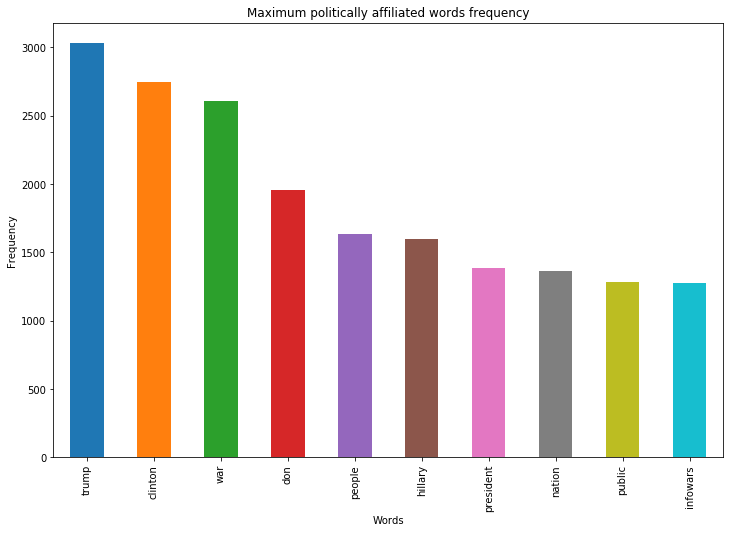

In [10]:
list_sorted = [i[0] for i in sorted(enumerate(pol._norm), key=lambda x:x[1],reverse=True)]

words = [pol.df['dictionary'].unique()[list_sorted[i]] for i in range(0,10)]
numbers = [pol._norm[list_sorted[i]] for i in range(0,10)] 
freq_series = pd.Series.from_array(numbers)

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Maximum politically affiliated words frequency')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_xticklabels(words)
plt.show()

###### Inference: From the above graph it can infreed that, Trump and Clinton are the maximum politically affiliated words occuring in the entire dataset.

#### Graphical representation of maximum politically affiliated words frequency in an Article

Article from dataset: Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? 
Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! 
We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  import sys


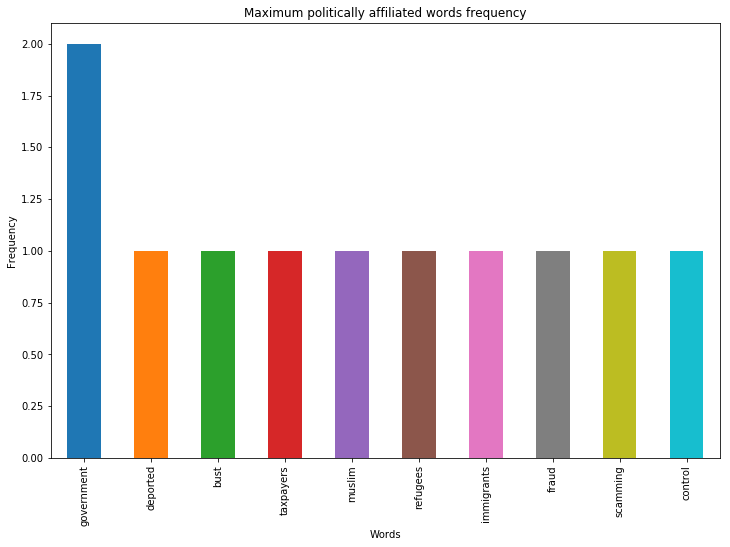

In [11]:
idx = 0

list_sorted = [i[0] for i in sorted(enumerate(pol.scores_unnorm[idx]), key=lambda x:x[1],reverse=True)]
print('Article from dataset:',p_data['text'][idx])
words = [pol.df['dictionary'].unique()[list_sorted[i]] for i in range(0,10)]
numbers = [pol.scores_unnorm[idx][list_sorted[i]] for i in range(0,10)] 
freq_series = pd.Series.from_array(numbers)
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Maximum politically affiliated words frequency')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_xticklabels(words)
plt.show()

In [12]:
wordCount_scores =pol.scores
_pa_features = wordCount_scores
wordCount_print = pol.print_string
cosine_dist = [item[0] for item in pol.cosine_dist]
cosine_print= [item[1] for item in pol.cosine_dist]
cosine_dist = np.asmatrix(cosine_dist).T
pa_features = np.append(wordCount_scores, cosine_dist,1)
pol_printString = ['{} + {}'.format(x1,x2) for x1,x2 in zip(wordCount_print, cosine_print)]
for idx in np.random.randint(len(pol_printString), size=10):
    print('Topic {}: {}\n'.format(idx,pol_printString[idx]))

Topic 874:  + 0.4285714285714285*"incumbent"  + 0.009009009009009009*"republic"  + 0.005361930294906166*"investigation"  + 0.004651162790697674*"administration"  + 0.001878522229179712*"hillary"  + 0.002352941176470588*"democratic"  + 0.001218026796589525*"democrat"  + 0.009749303621169917*"republican"  + 0.009983361064891847*"fbi"  + 0.006559766763848397*"clinton"  + 0.001221001221001221*"people"  + 0.0007911392405063291*"election"  + 0.0010111223458038423*"media"  + 0.003169572107765452*"political"  + 0.0034934497816593887*"campaign"  + 0.001534526854219949*"don"  + 0.0010141987829614604*"american"  + 0.005447470817120622*"public"  + 0.002570694087403599*"voters"  + 0.0016155088852988692*"white"  + 0.0015987210231814548*"vote"  + 0.0036496350364963502*"house"  + 0.017241379310344827*"comey"  + 0.02142857142857143*"republicans"  + 0.003952569169960474*"federal"  + 0.007142857142857143*"press"  + 0.004464285714285714*"nominee"  + 0.0017889087656529517*"voter"  + 0.008064516129032258*"p

In [13]:
# Creating custom corpus for LDA
_dict_values = pol._dict_values
def getcorpus(_stream):
    global _dict_values
    to_return=[]
    for idx,i in enumerate(_stream):
#         print(idx,i)
        if(i>0):
            to_return.append(tuple((idx,i)))
    return to_return
            
cust_corpus = [getcorpus(wordcount) for wordcount in wordCount_scores] 

In [14]:
print(cust_corpus[1])

[(1, 0.002197802197802198), (63, 0.023809523809523808), (95, 0.02857142857142857), (96, 0.013468013468013467), (97, 0.24999999999999994), (98, 0.1), (99, 0.002680965147453083), (100, 0.008403361344537815), (101, 0.00558659217877095), (102, 0.008658008658008658), (103, 0.0012391573729863693), (104, 0.009302325581395349), (120, 0.025), (121, 0.08), (122, 0.0033112582781456954), (123, 0.015527950310559006), (124, 0.025), (125, 0.16666666666666663), (126, 0.0047169811320754715), (127, 0.09999999999999998), (128, 0.008547008547008548), (130, 0.009708737864077669), (162, 0.0013020833333333333), (164, 0.0010141987829614604), (167, 0.0007782101167315176), (174, 0.0026666666666666666)]


## Applying Distillation
###  1. LDA - Latent Dirichlet allocation

In [15]:
# Applying LDA
from gensim.corpora import Dictionary
to_array = [[word] for word in _dict_values]
dct = Dictionary(to_array)
from gensim import corpora, models
lda_model = models.LdaMulticore(cust_corpus, num_topics=10, id2word=dct, passes=2, workers=2)

In [16]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \t Words: {} \n'.format(idx, topic))

Topic: 0 	 Words: 0.027*"theocracy" + 0.027*"boondoggle" + 0.027*"gubernatorial" + 0.027*"oligarchy" + 0.020*"jew" + 0.020*"jewish" + 0.019*"altruism" + 0.019*"bourgeois" + 0.018*"deported" + 0.018*"referendum" 

Topic: 1 	 Words: 0.024*"federalism" + 0.020*"populism" + 0.020*"rapprochement" + 0.019*"impeachment" + 0.016*"infowarsstore" + 0.015*"speaker" + 0.015*"infowars" + 0.015*"caucus" + 0.015*"palestine" + 0.014*"bipartisan" 

Topic: 2 	 Words: 0.028*"nomenklatura" + 0.028*"wonk" + 0.022*"hostages" + 0.019*"cabinet" + 0.018*"turnout" + 0.016*"elector" + 0.015*"demagogue" + 0.015*"zeitgeist" + 0.012*"capitalism" + 0.009*"electorate" 

Topic: 3 	 Words: 0.029*"commodification" + 0.029*"mercantilism" + 0.029*"boilerplate" + 0.024*"armistice" + 0.024*"surgery" + 0.023*"woke" + 0.020*"prejudice" + 0.016*"michelle" + 0.016*"demagogue" + 0.015*"whip" 

Topic: 4 	 Words: 0.029*"communitarianism" + 0.029*"promulgate" + 0.024*"groupthink" + 0.024*"hegemony" + 0.019*"franchise" + 0.016*"corr

In [17]:
summ = []
for index, score in sorted(lda_model[cust_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    summ .append(score)
print(summ)


Score: 0.5959452986717224	 
Topic: 0.026*"scamming" + 0.026*"nihilism" + 0.021*"bellwether" + 0.020*"quota" + 0.016*"nuclear" + 0.016*"socialism" + 0.015*"hack" + 0.013*"russians" + 0.013*"putin" + 0.012*"intelligence"

Score: 0.044979602098464966	 
Topic: 0.027*"theocracy" + 0.027*"boondoggle" + 0.027*"gubernatorial" + 0.027*"oligarchy" + 0.020*"jew" + 0.020*"jewish" + 0.019*"altruism" + 0.019*"bourgeois" + 0.018*"deported" + 0.018*"referendum"

Score: 0.044940393418073654	 
Topic: 0.030*"libertarianism" + 0.030*"watermelon" + 0.028*"suffrage" + 0.017*"taxpayers" + 0.017*"zeitgeist" + 0.013*"newspaper" + 0.011*"mandate" + 0.010*"undercover" + 0.010*"establishment" + 0.009*"caucus"

Score: 0.04488557577133179	 
Topic: 0.024*"caliphate" + 0.023*"pairing" + 0.018*"autonomy" + 0.017*"constituent" + 0.016*"incriminating" + 0.013*"platform" + 0.012*"global" + 0.012*"freedom" + 0.011*"snowflake" + 0.011*"lawmakers"

Score: 0.044884297996759415	 
Topic: 0.028*"nomenklatura" + 0.028*"wonk" + 

In [18]:
def getScorePerCorpus(corpus):
    global lda_model
    summ = []
    for index, score in sorted(lda_model[corpus], key=lambda tup: -1*tup[1]):
        summ .append(score)
    return np.median(summ)

score_pa = [getScorePerCorpus(corp) for corp in cust_corpus]
score_pa = score_pa-np.min(score_pa)
score_pa = score_pa/np.max(score_pa)

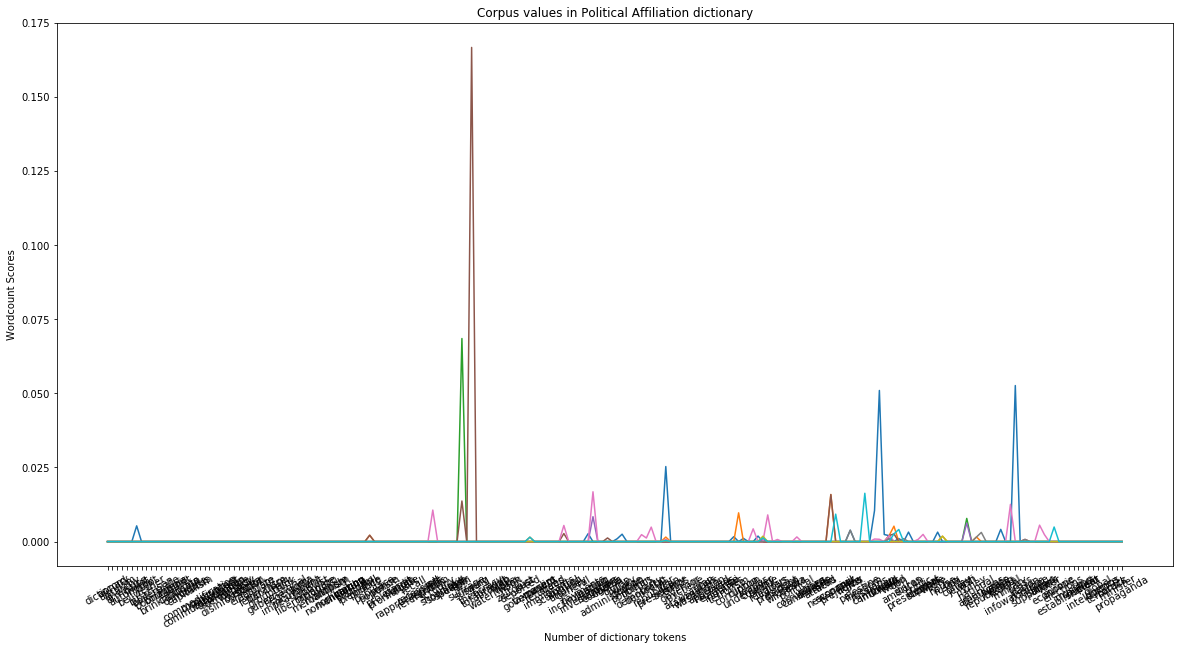

In [19]:
# plt.rcParams['figure.figsize'] = [20, 10]
x= [i for i in range(0,np.shape(wordCount_scores)[1])]
_mat = np.matrix([x for i in range(0,p_data.shape[0])])
import random
idx = random.sample(range(0, np.shape(wordCount_scores)[0]), 10)

_dict_values = [words for words in dct.token2id] 
# print(_dict_values)
fig, ax = plt.subplots(figsize=[20,10])
ax.set_title("Corpus values in Political Affiliation dictionary")
ax.set_xlabel("Number of dictionary tokens")
ax.set_ylabel("Wordcount Scores")
plt.xticks(x, _dict_values[:],rotation=30)

plt.plot( _mat[idx,:].T,np.matrix(wordCount_scores)[idx,:].T)
plt.show()

### 2. LSI - Latent semantic analysis

In [20]:
from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel
model = LsiModel(common_corpus, id2word=common_dictionary)
vectorized_corpus = model[common_corpus]  # vectorize input copus in BoW format

###  3. SVD - Singular Value decomposition

In [21]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
from sklearn.decomposition import TruncatedSVD
output_notebook()
plt.rcParams['figure.figsize'] = [20, 10]
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(np.matrix(wordCount_scores).T)
 
df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1],_dict_values 
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

Loading BokehJS ...

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def process_sent(sentance):
    return [s for s in sentance.split() if s in _dict_values]
sentences = [" ".join(process_sent(sentence)) for sentence in p_data['processed_text'].values]
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
stop_words='english', lowercase=True, 
token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(sentences)

lda_model = LatentDirichletAllocation(n_topics=10, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [24]:
import pyLDAvis.sklearn
# 
from sklearn.feature_extraction.text import CountVectorizer
plt.rcParams['figure.figsize'] = [10, 5]
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5        0.391367 -169.850464       1        1  23.248928
9      271.744141 -233.088470       2        1  15.834199
0      380.463104   58.990391       3        1  13.737250
8     -403.649750   66.143349       4        1  12.606216
1     -154.326416  315.097260       5        1   9.783206
7      150.681229  325.956024       6        1   8.365118
6     -141.783783   44.959572       7        1   7.548135
4      -11.966414 -430.441925       8        1   4.615985
3      115.390930   60.825848       9        1   3.040500
2     -282.569489 -231.565521      10        1   1.220462, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
151   Default  2895.000000          trump  2895.000000  30.0000  30.0000
69    Default  1097.000000       infowars  1097.000000  29.0000  29.0000
23    Default  2620.000000        clinton  2620.000000  28.0000  28.0000
63    Default  1585.000000        hillary  1585.000000  27.0000  27.0000
17    Default  1123.000000       campaign  1123.000000  26.0000  26.0000
51    Default   588.000000            fbi   588.000000  25.0000  25.0000
77    Default   354.000000         jewish   354.000000  24.0000  24.0000
103   Default   732.000000          obama   732.000000  23.0000  23.0000
44    Default  1023.000000       election  1023.000000  22.0000  22.0000
107   Default  1544.000000         people  1544.000000  21.0000  21.0000
40    Default   775.000000         donald   775.000000  20.0000  20.0000
155   Default   210.000000          voter   210.000000  19.0000  19.0000
156   Default   391.000000         voters   391.000000  18.0000  18.0000
154   Default   462.000000           vote   462.000000  17.0000  17.0000
86    Default   811.000000          media   811.000000  16.0000  16.0000
25    Default   344.000000          comey   344.000000  15.0000  15.0000
54    Default   170.000000          fraud   170.000000  14.0000  14.0000
70    Default   239.000000  infowarsstore   239.000000  13.0000  13.0000
73    Default   312.000000  investigation   312.000000  12.0000  12.0000
5     Default   325.000000           anti   325.000000  11.0000  11.0000
94    Default   280.000000         muslim   280.000000  10.0000  10.0000
74    Default   238.000000           iran   238.000000   9.0000   9.0000
117   Default   865.000000      president   865.000000   8.0000   8.0000
157   Default   232.000000         voting   232.000000   7.0000   7.0000
131   Default   433.000000     republican   433.000000   6.0000   6.0000
45    Default   142.000000      elections   142.000000   5.0000   5.0000
39    Default   637.000000            don   637.000000   4.0000   4.0000
59    Default   580.000000     government   580.000000   3.0000   3.0000
162   Default   711.000000          world   711.000000   2.0000   2.0000
75    Default   183.000000        islamic   183.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
71    Topic10     0.131516      inquiries    10.083058   0.0665  -8.2343
115   Topic10     0.131518      prejudice    10.672133   0.0097  -8.2343
84    Topic10     0.131406       lobbyist    10.745149   0.0020  -8.2351
37    Topic10     0.132531       deported    10.986801  -0.0117  -8.2266
10    Topic10     0.131556       autonomy    11.938848  -0.1022  -8.2340
139   Topic10     0.131545      socialism    12.531646  -0.1507  -8.2341
137   Topic10     0.131880       scrutiny    14.679976  -0.3064  -8.2315
126   Topic10     0.131531      recession    14.735905  -0.3129  -8.2342
85    Topic10     0.134052        mandate    15.049741  -0.3149  -8.2152
44    Topic10     6.236652       election  1023.253845  -0.6944  -4.3752
69    Topic10     3.589039       infowars  1097.286445  -1.3168  -4.9278
156   Topic10     0.439318         voters   391.1

<function matplotlib.pyplot.show(*args, **kw)>

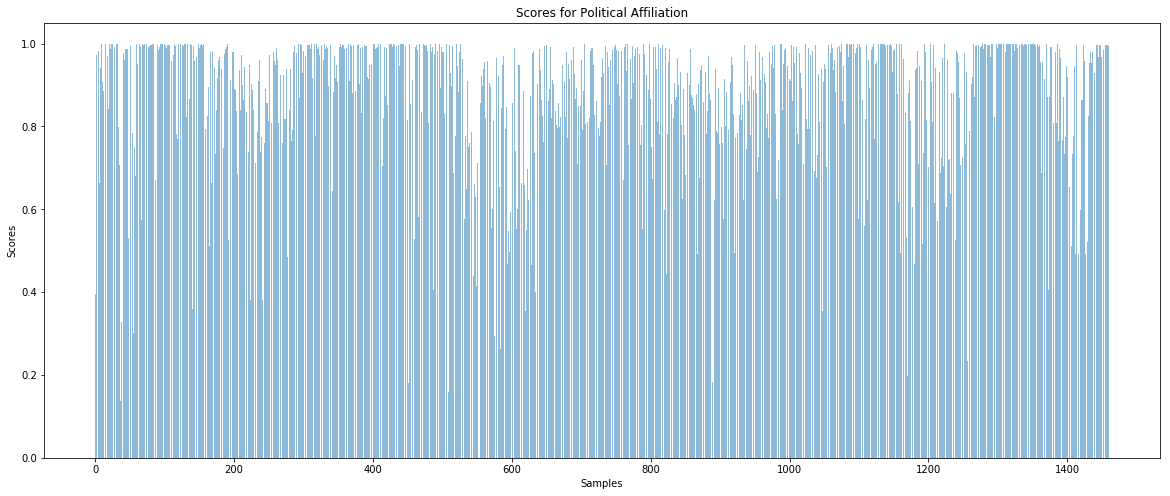

In [25]:
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Scores for Political Affiliation")
ax.set_xlabel("Samples")
ax.set_ylabel("Scores")
plt.bar(range(len(score_pa)),score_pa,  align='center', alpha=0.5)
plt.show

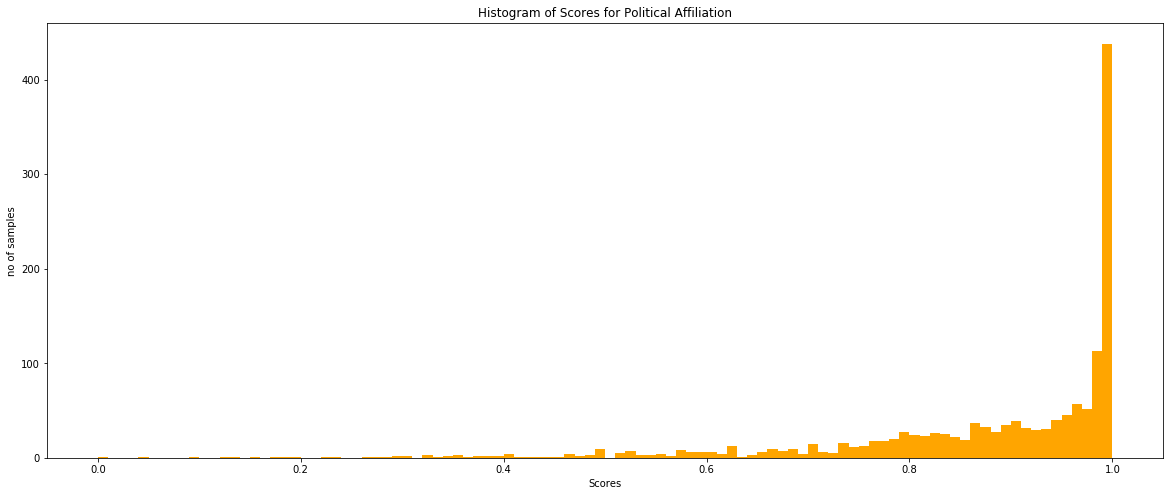

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Histogram of Scores for Political Affiliation")
ax.set_xlabel("Scores")
ax.set_ylabel("no of samples")
N, bins, patches = ax.hist(score_pa, bins=100, color="orange") #initial color of all bins
plt.show()

## Ranking 

### Ranking Articles based on Political score

The ranking is very useful because it sorts the data in a specific order for easier consumption and analysis. Performing ranking on articles that are political affiliated helps us in deriving a sorted list of articles which gives us the most politically affiliated article at the top of the list from the entire dataset. 

The ranking for political affiliation factor is done based on political score. Following are the steps followed to perform ranking for political affiliation factor on the dataset:
- The political score is calculated based on cosine similarity between dictionary of political words (that was manually prepared) and the articles in the dataset.
-  Perform sorting on all the articles based by the political score calculated above in descending order.


In [27]:
# Ranking for political scores

p_data['Political_scores'] = cosine_dist

political_SortedDataframe = p_data.sort_values('Political_scores',ascending=False)

political_SortedDataframe.head(10)


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


uuid  ord_in_thread  \
37     236eaaea138082b5f4e8362de5e8e5584d8e7ef4              0   
6479   62e2ddb2662229fc9563cc2606c286544e5f7978              0   
6516   4c37598016d48ee823f7a5832003a5f1c5d9176b              0   
12647  2134439464f0fd2c0eb043860f61b93a59a8381c              0   
12651  d71e22efbde8ecd594c5444be2b252f9f7d83f82              0   
8038   efa576cbe50d9fcd26e80c0e1ec80b70f8b42b33              0   
3708   a81497755c3bbe4a995bff16a3ccf8da472c0cce              0   
7994   cb4ee5966559c76e942bff30be5bb611e06a5b57              0   
7996   3e34bc87d44a1320252e11b1f33aac0e3a67499d              0   
38     9705f82da90935a714b424d8fafa93fba75be998              0   

                               author                      published  \
37                                NaN  2016-11-01T16:48:00.000+02:00   
6479   Mike Adams, NaturalNews Editor  2016-10-30T13:00:00.000+02:00   
6516   Mike Adams, NaturalNews Editor  2016-11-02T07:13:15.455+02:00   
12647                     Leo Hohmann  2016-10-27T03:12:09.534+03:00   
12651                     Leo Hohmann  2016-10-27T03:32:35.039+03:00   
8038                    Beau Albrecht  2016-11-25T00:07:57.204+02:00   
3708                 Emma-Kate Symons  2016-10-28T07:55:07.497+03:00   
7994                   Bernie Paprika  2016-11-10T20:49:03.992+02:00   
7996                    André du Pôle  2016-11-11T15:03:46.838+02:00   
38                       Shawn Helton  2016-11-04T00:03:00.000+02:00   

                                                   title  \
37     Hillary’s ‘Russian Hack’ Hoax: The Biggest Lie...   
6479   Clinton crime family must be taken down... ARR...   
6516   THE END GAME closes in on the Clintons as the ...   
12647  26 WikiLeaks bombshells on Hillary you need to...   
12651  26 WikiLeaks bombshells on Hillary you need to...   
8038         The Ugly Truth Of Six More Leftist “Heroes”   
3708   Zineb el Rhazoui, Charlie Hebdo Survivor, Disc...   
7994   5 Things America Can Learn From Hungary’s Resi...   
7996   Why So-Called Intellectuals Do More Harm Than ...   
38     PARTNERS IN CRIME: Goldman Sachs, The Clintons...   

                                                    text language  \
37     November 1, 2016 By 21wire 4 Comments \nPatric...  english   
6479   Clinton crime family must be taken down... ARR...  english   
6516   THE END GAME closes in on the Clintons as the ...  english   
12647  26 WikiLeaks bombshells on Hillary you need to...  english   
12651  26 WikiLeaks bombshells on Hillary you need to...  english   
8038   Earlier I skewered nine dictators, thugs, dema...  english   
3708   Search Zineb el Rhazoui, Charlie Hebdo Survivo...  english   
7994     5 Things America Can Learn From Hungary’s Re...  english   
7996     Why So-Called Intellectuals Do More Harm Tha...  english   
38     November 3, 2016 By Shawn Helton 1 Comment \nS...  english   

                             crawled             site_url country  \
37     2016-11-02T10:39:07.600+02:00  21stcenturywire.com      US   
6479   2016-10-30T23:01:00.763+02:00      naturalnews.com      US   
6516   2016-11-02T07:13:15.455+02:00      naturalnews.com      US   
12647  2016-10-27T03:12:09.534+03:00              wnd.com      GB   
12651  2016-10-27T03:32:35.039+03:00              wnd.com      GB   
8038   2016-11-25T00:07:57.204+02:00    returnofkings.com      US   
3708   2016-10-28T07:55:07.497+03:00     frontpagemag.com      US   
7994   2016-11-10T20:49:03.992+02:00    returnofkings.com      US   
7996   2016-11-11T15:03:46.838+02:00    returnofkings.com      US   
38     2016-11-04T07:25:43.119+02:00  21stcenturywire.com      US   

            ...         spam_score  \
37          ...              0.293   
6479        ...              0.000   
6516        ...              0.000   
12647       ...              0.000   
12651       ...              0.000   
8038        ...              0.000   
3708        ...              0.000   
7994        ...              0.000   


### Inference
- The data science community is helping to fight against filtering out fake news from social media feeds and other resources with the help of AI.
- Detecting fake news is a classic example of text classification that helps in solving a problem: Can you build a model that can differentiate between “Real” news vs “Fake” news?
- Political affiliation is an important factor to determine if a news is fake or not.
- The considered kaggle dataset for "Fake news" has political parameters which will help us in determining if a news is fake or real.
- This score along with sentimaental analysis, social media activities can help us determine accurately on the factors contributing to fake news.

### References
- Researched on data-preprocessing steps for NLP.
- Researched on how we can efficiently build a dictionary manually.
- Researched on what different distillation algorithms can be used to extract features and apply them.
- References and links to example code referred:<br></br>
https://machinelearningmastery.com/clean-text-machine-learning-python/ <br></br>
https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568 <br></br>
https://github.com/aarsanjani/NLP-with-Python <br></br>
https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24 <br></br>
https://github.com/salesforce/cove

# Sindhu Goudru Shivanandappa Patil - Post based/Social Media Activities based

### Dictionary for Social Media activities

- The dictionary is built manually by considering words from online resources like 
http://www.oxfordreference.com/view/10.1093/acref/9780191803093.001.0001/acref-9780191803093?btog=chap&hide=true&page=9&pageSize=100&skipEditions=true&sort=titlesort&source=%2F10.1093%2Facref%2F9780191803093.001.0001%2Facref-9780191803093
- The link to the dictionary is: https://drive.google.com/drive/u/0/my-drive

#### The dictionary built manually for Social Media activities is taken and word count corpus is calculated.
- Gather all the values of text column from the dataset and split them into words.
- CountVectorizer is used to convert words to vectors.
- Then cosine similarity between dictionary and articles in the dataset
- Calculated word counts are converted to corpus, which is used in further processing

In [28]:
# filter data related to social media in each document
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial
class socialmediafilter:
    def __init__(self,path):
        self.path = path
        self.parse_dict()
        self.total_dict={}
        self.prob=[]
    def parse_dict(self):
        self.df = pd.read_csv(self.path,header = None)
        self.df.columns = ['dictionary']
    def getmatchWords(self,doc):
        to_return= []
        #Normalise the scores
        for word in self.df['dictionary'].unique():
            _count = doc.count(word)
            if(_count>0):
                to_return.append(float(_count))
            else:
                to_return.append(0)
        return to_return
    def getcosineWords(self,doc):
        to_return= []
        for word in self.df['dictionary'].unique():
            _count = doc.count(word)
            if(_count>0):
                to_return.append(word)
                
        return ' '.join(to_return)
    def getnotNAN(self,num):
        if np.isnan(num):
            return 0
        else:
            return num
    def getstr(self,arr):
        _str = ''
        i=0
        for word in self.df['dictionary'].unique():
            if(arr[i]>0):
                _str="""{} + {}*"{}" """.format(_str,arr[i],word)
            i=i+1
        return _str
    def fit(self,column):
        #Calculating TF-IDF Scores
        self.scores_unnorm = [self.getmatchWords(word) for word in column]
        #Calculate the frequency of the dictionary words in the datset to get "TF-IDF Scores"
        self._norm = np.sum(self.scores_unnorm,axis=0)+0.000000000000001
        self.scores = [self.scores_unnorm[i]/self._norm for i in range(0,np.shape(self.scores_unnorm)[0])] 
        
        self.print_string = [self.getstr(self.scores[i]) for i in range(0,np.shape(self.scores)[0])]
        
        #Calculating Cosine Values
        cosinewords = [self.getcosineWords(word) for word in column]
        cosinewords.append(self.getcosineWords(' '.join(self.df['dictionary'].unique())))
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(cosinewords)
        self.cosine_dist = [[self.getnotNAN(1 - spatial.distance.cosine(X[i,:].toarray(), X[-1,:].toarray())),""" {}*"cosine-dist" """.format(self.getnotNAN(1 - spatial.distance.cosine(X[i,:].toarray(), X[-1,:].toarray())))] for i in range(0,np.shape(X)[0]-1)]

#Read the Social Media dictionary data
social = socialmediafilter('./SocialMediaDictionary.csv')

print(social.df.head(5))

            dictionary
0          A/B testing
1  academic networking
2           access log
3              account
4   actionable metrics


In [29]:
social.fit(p_data['processed_text'].values)

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


### The graph represents frequency of social media dictionary words that appeared in the dataset.

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """


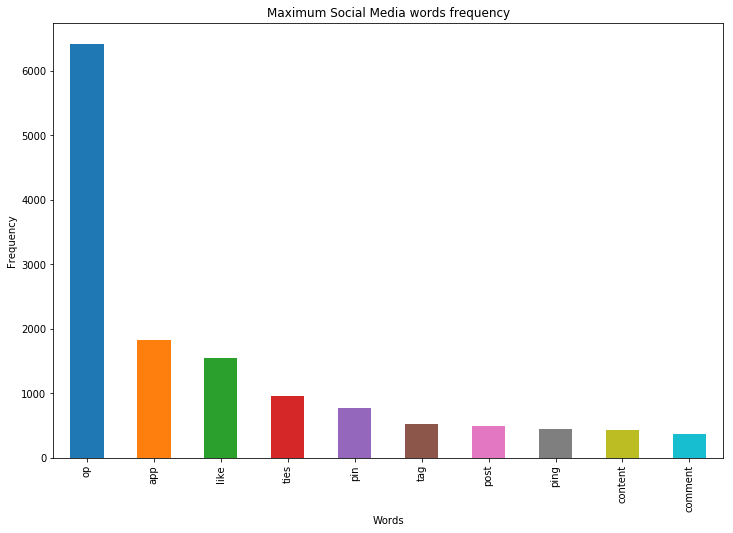

In [30]:
list_sorted = [i[0] for i in sorted(enumerate(social._norm), key=lambda x:x[1],reverse=True)]

words = [social.df['dictionary'].unique()[list_sorted[i]] for i in range(0,10)]
numbers = [social._norm[list_sorted[i]] for i in range(0,10)] 
freq_series = pd.Series.from_array(numbers)

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Maximum Social Media words frequency')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_xticklabels(words)
plt.show()

### The below graph shows the frequency of the words from the social media dictionary that appeared in one article. The article is  chosen randomly from the dataset.

Article from dataset: Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? 
Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! 
We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  import sys


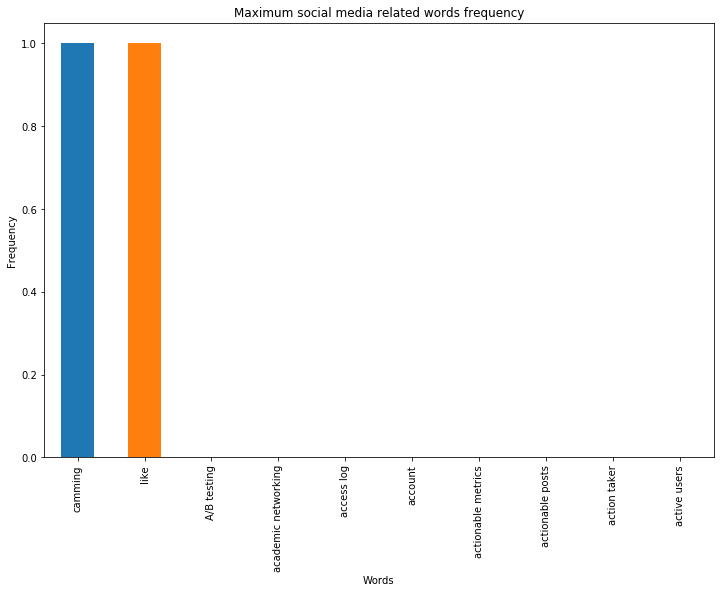

In [31]:
idx = 0

list_sorted = [i[0] for i in sorted(enumerate(social.scores_unnorm[idx]), key=lambda x:x[1],reverse=True)]
print('Article from dataset:',p_data['text'][idx])
words = [social.df['dictionary'].unique()[list_sorted[i]] for i in range(0,10)]
numbers = [social.scores_unnorm[idx][list_sorted[i]] for i in range(0,10)] 
freq_series = pd.Series.from_array(numbers)
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Maximum social media related words frequency')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_xticklabels(words)
plt.show()

In [32]:
#Words to vector matrix for an article in the dataset
print(social.scores[0])

[0. 0. 0. ... 0. 0. 0.]


### The values of cosine similarity of the words in the dataset with respect to the social media dictionary is shown below.

In [33]:
#Cosine similarity of the sample
print(social.cosine_dist[0])

[0.006231639430568481, ' 0.006231639430568481*"cosine-dist" ']


### The weights of the words with non zero values are displayed below, which resulted from calculating the word count corpus.

In [34]:
wordCount_scores =social.scores
tfidf_print = social.print_string
_sc_features = wordCount_scores
wordCount_print = social.print_string
cosine_dist = [item[0] for item in social.cosine_dist]
cosine_print= [item[1] for item in social.cosine_dist]
cosine_dist = np.asmatrix(cosine_dist).T
social_features = np.append(wordCount_scores, cosine_dist,1)
social_printString = ['{} + {}'.format(x1,x2) for x1,x2 in zip(tfidf_print, cosine_print)]
for idx in np.random.randint(len(social_printString), size=10):
    print('Topic {}: {}\n'.format(idx,social_printString[idx]))

Topic 185:  + 0.0005488474204171241*"app"  + 0.00273224043715847*"comment"  + 0.0006451612903225806*"like"  + 0.0001556420233463035*"op"  + 0.0025974025974025974*"pin"  + 0.07142857142857142*"traffic"  +  0.1369814367016987*"cosine-dist" 

Topic 0:  + 0.9999999999999989*"camming"  + 0.0006451612903225806*"like"  +  0.006231639430568481*"cosine-dist" 

Topic 415:  + 0.0010976948408342481*"app"  + 0.0625*"connections"  + 0.016260162601626018*"link"  + 0.000311284046692607*"op"  + 0.01910828025477707*"server"  + 0.001941747572815534*"tag"  + 0.0010438413361169101*"ties"  +  0.07897208329796779*"cosine-dist" 

Topic 1324:  + 0.0040650406504065045*"admin"  + 0.000311284046692607*"op"  +  0.0025336178850159374*"cosine-dist" 

Topic 684:  + 0.001646542261251372*"app"  + 0.00546448087431694*"comment"  + 0.9999999999999989*"friending"  + 0.004830917874396135*"host"  + 0.14285714285714285*"hosting"  + 0.0025974025974025974*"pin"  + 0.004454342984409799*"ping"  +  0.016664628375192225*"cosine-dis

In [35]:
# Ranking for political scores
sorted_scores = sorted(enumerate(cosine_dist), key=lambda x: x[1],reverse=True)
social_ranking = np.zeros(len(cosine_dist))
i=1
for _zipp in sorted_scores:
    social_ranking[_zipp[0]] = i
    print(_zipp[1])
    i=i+1

[[0.58616211]]
[[0.56963318]]
[[0.46224892]]
[[0.45367506]]
[[0.44567706]]
[[0.44239864]]
[[0.44209615]]
[[0.4416884]]
[[0.42468491]]
[[0.42258233]]
[[0.41935737]]
[[0.4143632]]
[[0.41409472]]
[[0.41055379]]
[[0.40344655]]
[[0.3959566]]
[[0.39481517]]
[[0.38918511]]
[[0.38338685]]
[[0.36338158]]
[[0.35099978]]
[[0.34290997]]
[[0.34215393]]
[[0.34215393]]
[[0.33935341]]
[[0.32203869]]
[[0.32027129]]
[[0.31644631]]
[[0.3144451]]
[[0.31071248]]
[[0.30946688]]
[[0.30034914]]
[[0.30034914]]
[[0.2996096]]
[[0.28783697]]
[[0.28726694]]
[[0.27870558]]
[[0.2700301]]
[[0.26637937]]
[[0.26587662]]
[[0.25539963]]
[[0.24699168]]
[[0.2371008]]
[[0.22949804]]
[[0.22486454]]
[[0.2221614]]
[[0.22049159]]
[[0.21031922]]
[[0.20457446]]
[[0.20040854]]
[[0.20040854]]
[[0.19137122]]
[[0.19111753]]
[[0.18790745]]
[[0.1814477]]
[[0.1814477]]
[[0.17676025]]
[[0.17567374]]
[[0.17293879]]
[[0.16997321]]
[[0.16963832]]
[[0.16744432]]
[[0.16666468]]
[[0.16591785]]
[[0.16451842]]
[[0.16130072]]
[[0.16023699]]
[[0.1

[[0.0110977]]
[[0.01098195]]
[[0.01096321]]
[[0.01091937]]
[[0.01085578]]
[[0.01081991]]
[[0.01076994]]
[[0.01076414]]
[[0.01072416]]
[[0.01067069]]
[[0.01064327]]
[[0.01055179]]
[[0.01054135]]
[[0.01054135]]
[[0.01051677]]
[[0.01041311]]
[[0.010351]]
[[0.01033011]]
[[0.01019072]]
[[0.01018435]]
[[0.01014068]]
[[0.01002528]]
[[0.0100006]]
[[0.00994758]]
[[0.00992418]]
[[0.00989271]]
[[0.00987527]]
[[0.0098252]]
[[0.00981452]]
[[0.00975726]]
[[0.00975726]]
[[0.00972223]]
[[0.00962614]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00958466]]
[[0.00952837]]
[[0.00952837]]
[[0.00947443]]
[[0.00943486]]
[[0.00927055]]
[[0.00927021]]
[[0.00927021]]
[[0.00922138]]
[[0.0092171]]
[[0.0092034]]
[[0.00919558]]
[[0.00915849]]
[[0.00911341]]
[[0.00911341]]
[[0.00908045]]
[[0.00906827]]
[[0.00906827]]
[[0.00895718]]
[[0.00895718]]
[[0.00895718]]
[[0.00894334]]
[[

### The below code creates a custom corpus meaning it eliminates weights with value zero and retains index of the word and its non zero weight

In [36]:
# Creating custom corpus for LDA
_dict_values = social.df['dictionary'].values
def getcorpus(_stream):
    global _dict_values
    to_return=[]
    for idx,i in enumerate(_stream):
        if(i>0):
            to_return.append(tuple((idx,i)))
    return to_return
            
cust_corpus = [getcorpus(wordcount) for wordcount in wordCount_scores] 

In [37]:
print(cust_corpus[1])

[(13, 0.008130081300813009), (60, 0.0005488474204171241), (93, 0.05), (492, 0.004830917874396135), (1483, 0.001941747572815534)]


### Applying Distillation algorithm - Latent Dirichlet Allocation (LDA) for social media activities based factor .

In [38]:
# Applying LDA
from gensim.corpora import Dictionary
to_array = [[word] for word in _dict_values]
dct = Dictionary(to_array)
from gensim import corpora, models
lda_model = models.LdaMulticore(cust_corpus, num_topics=10, id2word=dct, passes=2, workers=2)

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

### The custom corpus will be given as input to LDA and the output of the LDA model will be 10 latent variables per article or sample in the dataset as shown below.

In [39]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \t Words: {} \n'.format(idx, topic))

Topic: 0 	 Words: 0.006*"webpage" + 0.006*"web address" + 0.006*"landing page" + 0.006*"blogosphere" + 0.006*"content provider" + 0.006*"storytelling" + 0.006*"tagging" + 0.006*"forgetting" + 0.006*"community guidelines" + 0.005*"phishing" 

Topic: 1 	 Words: 0.006*"liking" + 0.006*"subreddit" + 0.006*"anonymity" + 0.005*"live streaming" + 0.004*"operator" + 0.004*"shares" + 0.003*"collaboration" + 0.003*"stalking" + 0.003*"alerts" + 0.003*"bridge" 

Topic: 2 	 Words: 0.006*"filtering" + 0.006*"predictive analytics" + 0.006*"annotation" + 0.006*"personalization" + 0.006*"metrics" + 0.005*"repost" + 0.005*"robot" + 0.005*"tagger" + 0.004*"readiness" + 0.004*"followers" 

Topic: 3 	 Words: 0.006*"commodification" + 0.006*"etiquette" + 0.006*"texting" + 0.006*"flaming" + 0.006*"participatory democracy" + 0.006*"owned media" + 0.006*"blogpost" + 0.006*"online video" + 0.004*"social network" + 0.003*"celebrity" 

Topic: 4 	 Words: 0.006*"head term" + 0.006*"group chat" + 0.006*"impressions"

### Printing all the scores per latent variable for the first atricle. This is just an example.
### All the 10 scores per article sum up to 1.

In [40]:
summ = []
for index, score in sorted(lda_model[cust_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    summ .append(score)
print(summ)


Score: 0.5501450896263123	 
Topic: 0.005*"social media platforms" + 0.005*"friending" + 0.005*"camming" + 0.005*"network effect" + 0.005*"media relations" + 0.005*"moderator" + 0.005*"clusters" + 0.004*"interactions" + 0.004*"instant messaging" + 0.004*"protocol"

Score: 0.04998389631509781	 
Topic: 0.006*"head term" + 0.006*"group chat" + 0.006*"impressions" + 0.006*"retweet" + 0.006*"online social media" + 0.006*"pingback" + 0.006*"affinity" + 0.005*"farming" + 0.005*"traditional media" + 0.004*"recommendations"

Score: 0.049983877688646317	 
Topic: 0.006*"online community" + 0.006*"gatekeeping" + 0.006*"web portal" + 0.006*"portal" + 0.006*"markup" + 0.006*"torrent" + 0.006*"cookies" + 0.006*"clickbait" + 0.006*"grazing" + 0.006*"visibility"

Score: 0.049983877688646317	 
Topic: 0.005*"internet meme" + 0.005*"node" + 0.005*"news aggregator" + 0.005*"social media censorship" + 0.005*"social networking" + 0.005*"user profile" + 0.005*"aggregator" + 0.005*"php" + 0.005*"buckets" + 0.0

### Each article has 10 scores and a mean of the 10 values is taken and assigned as score per article.

In [41]:
def getScorePerCorpus(corpus):
    global lda_model
    summ = []
    for index, score in sorted(lda_model[corpus], key=lambda tup: -1*tup[1]):
        summ .append(score)
    return np.median(summ)

score_Social = [getScorePerCorpus(corp) for corp in cust_corpus]
score_Social = score_Social-np.min(score_Social)
score_Social = score_Social/np.max(score_Social)

### The below visualization represents word count scores for Social media activities

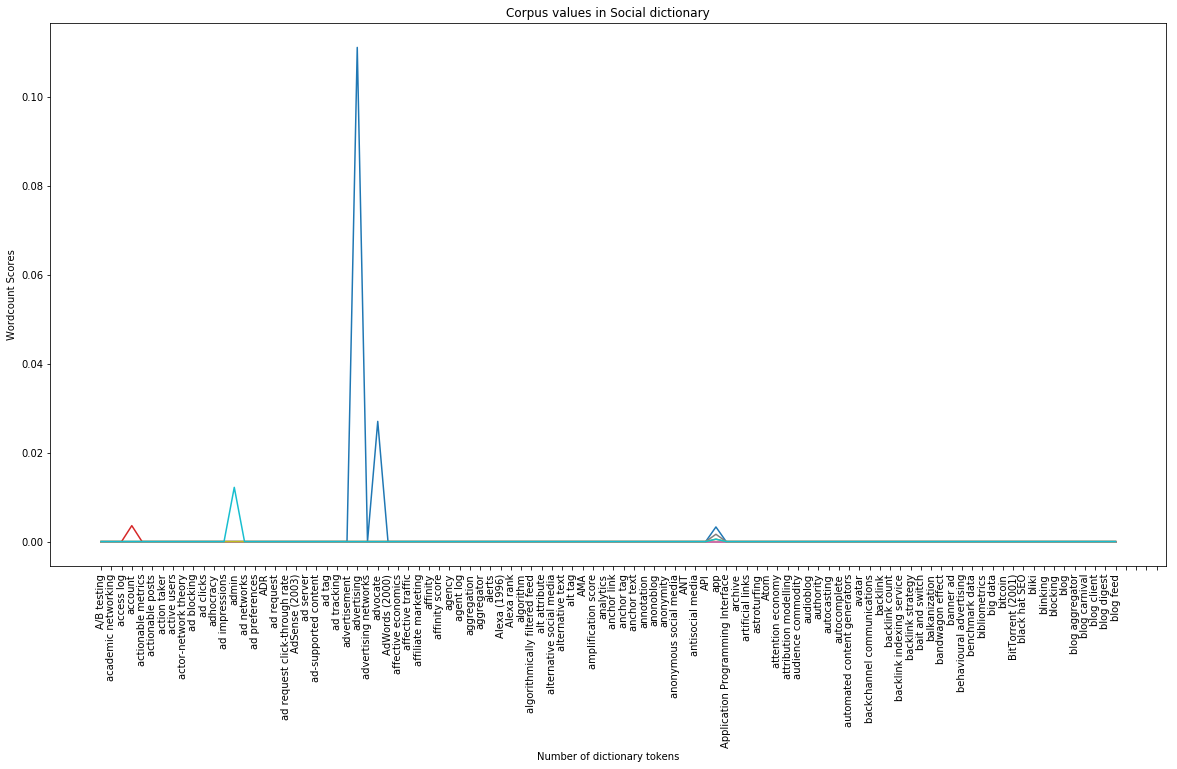

In [42]:
# plt.rcParams['figure.figsize'] = [20, 10]
x= [i for i in range(0,np.shape(wordCount_scores)[1])]
_mat = np.matrix([x for i in range(0,p_data.shape[0])])
import random
idx = random.sample(range(0, np.shape(wordCount_scores)[0]), 10)

_dict_values = [words for words in dct.token2id] 
# print(_dict_values)
fig, ax = plt.subplots(figsize=[20,10])
ax.set_title("Corpus values in Social dictionary")
ax.set_xlabel("Number of dictionary tokens")
ax.set_ylabel("Wordcount Scores")
plt.xticks(x, _dict_values[0:100],rotation=90)

plt.plot( _mat[idx,0:100].T,np.matrix(wordCount_scores)[idx,0:100].T)
plt.show()

In [43]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

def process_sent(sentance):
    return [s for s in sentance.split() if s in _dict_values]
sentences = [" ".join(process_sent(sentence)) for sentence in p_data['processed_text'].values]
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
stop_words='english', lowercase=True, 
token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(sentences)

lda_model = LatentDirichletAllocation(n_topics=10, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

<input>:9: DeprecationWarning: invalid escape sequence \-
<input>:9: DeprecationWarning: invalid escape sequence \-
<input>:9: DeprecationWarning: invalid escape sequence \-
<ipython-input-43-8599f5df9029>:9: DeprecationWarning: invalid escape sequence \-
  token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


### The below graph shows wordcount per article in the dataset

In [44]:
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
plt.rcParams['figure.figsize'] = [10, 5]
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel 

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      358.199860 -185.832001       1        1  21.582175
7     -444.157806  226.406754       2        1  16.742407
9       96.366219   66.285255       3        1  14.899719
6       56.879372 -291.007904       4        1  11.734384
8     -182.416000  -23.149197       5        1   9.180000
0     -494.196472 -124.506584       6        1   6.674182
2     -249.487457 -380.571960       7        1   5.919234
1      164.811371  421.360138       8        1   5.123477
5      409.213165  164.577042       9        1   4.824087
3     -143.418381  335.479340      10        1   3.320334, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
47    Default  1032.000000          like  1032.000000  30.0000  30.0000
26    Default   418.000000       content   418.000000  29.0000  29.0000
23    Default   169.000000     community   169.000000  28.0000  28.0000
61    Default   269.000000          post   269.000000  27.0000  27.0000
57    Default   249.000000     placement   249.000000  26.0000  26.0000
99    Default   246.000000        widget   246.000000  25.0000  25.0000
39    Default   139.000000       friends   139.000000  24.0000  24.0000
3     Default   140.000000        agency   140.000000  23.0000  23.0000
0     Default   172.000000       account   172.000000  22.0000  22.0000
74    Default   124.000000        server   124.000000  21.0000  21.0000
54    Default    94.000000       network    94.000000  20.0000  20.0000
94    Default    74.000000         views    74.000000  19.0000  19.0000
37    Default   177.000000     following   177.000000  18.0000  18.0000
97    Default   111.000000          wall   111.000000  17.0000  17.0000
59    Default    76.000000       polling    76.000000  16.0000  16.0000
12    Default    71.000000         board    71.000000  15.0000  15.0000
85    Default    89.000000          ties    89.000000  14.0000  14.0000
8     Default    65.000000     authority    65.000000  13.0000  13.0000
45    Default    84.000000     influence    84.000000  12.0000  12.0000
46    Default    91.000000        leader    91.000000  11.0000  11.0000
90    Default    72.000000         trust    72.000000  10.0000  10.0000
17    Default    88.000000       channel    88.000000   9.0000   9.0000
21    Default    94.000000       comment    94.000000   8.0000   8.0000
4     Default    50.000000        alerts    50.000000   7.0000   7.0000
81    Default    76.000000          site    76.000000   6.0000   6.0000
38    Default    50.000000         forum    50.000000   5.0000   5.0000
34    Default    35.000000          feed    35.000000   4.0000   4.0000
10    Default    39.000000          blog    39.000000   3.0000   3.0000
86    Default    33.000000         topic    33.000000   2.0000   2.0000
98    Default    62.000000       website    62.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
71    Topic10     0.129808     relevance     6.631555  -0.5284  -7.3026
56    Topic10     0.129788           pin     6.959411  -0.5768  -7.3027
65    Topic10     0.129813      protocol     6.980937  -0.5797  -7.3025
41    Topic10     0.129803       hashtag     7.497634  -0.6512  -7.3026
31    Topic10     0.129893    engagement     8.468638  -0.7723  -7.3019
5     Topic10     0.129807     anonymity     8.807912  -0.8123  -7.3026
80    Topic10     0.129751       signals     8.842312  -0.8166  -7.3030
16    Topic10     0.137945      champion     9.618802  -0.8395  -7.2418
22    Topic10     0.129928     commodity     9.189215  -0.8537  -7.3016
51    Topic10     0.129928      mentions     9.352630  -0.8713  -7.3016
20    Topic10     0.129821        client     9.373429  -0.8744  -7.3025
84    Topic10     0.129826  surveillance     9.375398  -0.8745  -7.3024
52    Topic10     0.1

### Printing score for Social Media activities per article

<function matplotlib.pyplot.show(*args, **kw)>

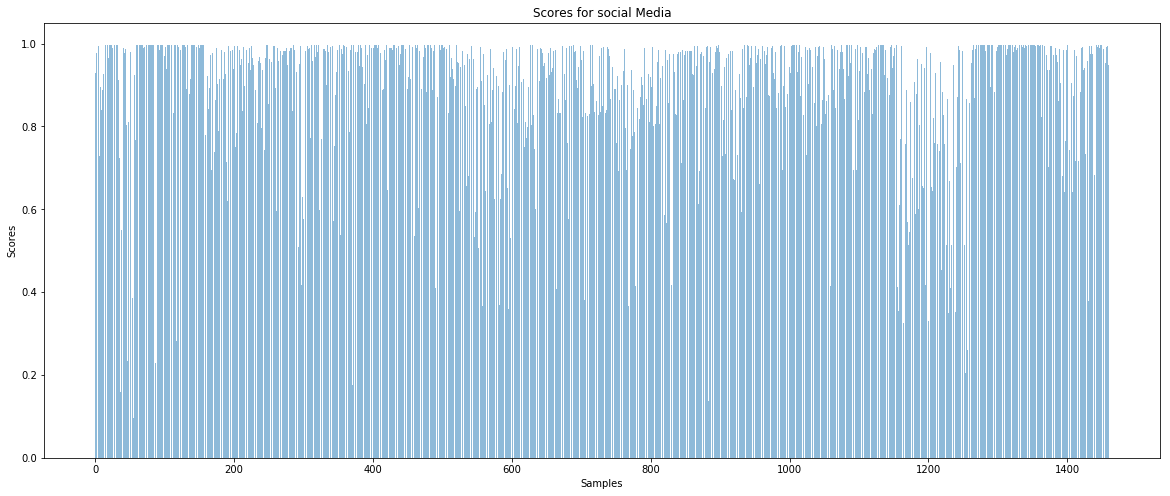

In [45]:
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Scores for social Media")
ax.set_xlabel("Samples")
ax.set_ylabel("Scores")
plt.bar(range(len(score_Social)),score_Social,  align='center', alpha=0.5)
plt.show

### Printing histogram of scores for Social Media activities factor

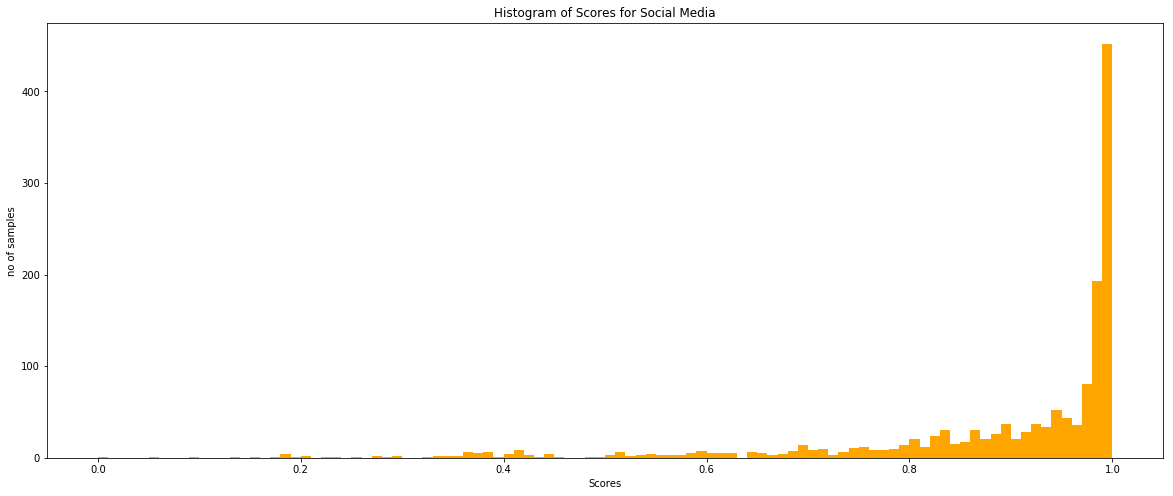

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Histogram of Scores for Social Media")
ax.set_xlabel("Scores")
ax.set_ylabel("no of samples")
N, bins, patches = ax.hist(score_Social, bins=100, color="orange") #initial color of all bins
plt.show()

### Applying second distillation algorithm - Non negative Matrix Factorization (NMF)

In [47]:
# Applying NMF
from sklearn.decomposition import NMF, TruncatedSVD
NUM_TOPICS = 10
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(wordCount_scores)
print(nmf_Z.shape) 


(1461, 10)


In [48]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

### Applying third distillation algorithm - Singular Value Decomposition (SVD)

In [49]:
# SVD
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(np.matrix(wordCount_scores).T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], _dict_values
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)
 

### Ranking for Social 

The score is caculated based on cosine similarity between the dictionary and the articles. 

The Articles shown below are sorted by the score in descending order.

In [50]:
# Ranking for Social Scores
p_data['Social_scores'] = social.cosine_dist

social_SortedDataframe = p_data.sort_values('Social_scores',ascending=False)

social_SortedDataframe.head(10)

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


uuid  ord_in_thread  \
6471  1554c62e6cd8d516ed00422d9d3de89deafa0786              0   
6443  09aa365ae51ad256341a585a3da9fb0756f99db3              0   
7959  f57f73812d225e84da7c64adfbb17dcfe4c3ab2b              0   
1575  8f03e40d7719b3273f1236b49ea3aaab88df2d6a              0   
8029  cb8ba28e3c70294ba02b2b7afbc1262a68a8d295              0   
4978  77bdfbbf57e6880d402f08ab2e8fbdf48c0c0514              0   
7678  4371267a98e250f55689aa5e71939dd8ee94abd0              0   
8023  e15d00ccffa473f3a121093ad852114abe6be9c1              0   
2356  15da0c1015eb0a79e602f22ad159e023a1694a03              0   
3741  0856425fdc0342a33a600c7f2115aee0ff6011b4              0   

                    author                      published  \
6471           J. D. Heyes  2016-10-30T13:00:00.000+02:00   
6443           johnrussell  2016-10-27T20:30:00.000+03:00   
7959       Ricardo Sanchez  2016-11-01T18:00:51.316+02:00   
1575                   NaN  2016-11-09T00:24:44.138+02:00   
8029       Roosh Valizadeh  2016-11-20T07:00:00.000+02:00   
4978       The Independent  2016-10-28T18:51:02.589+03:00   
7678                 admin  2016-10-27T17:44:49.314+03:00   
8023       Roosh Valizadeh  2016-11-20T19:13:28.138+02:00   
2356  Dr. Patrick Slattery  2016-11-15T01:37:15.948+02:00   
3741       Dawn Perlmutter  2016-11-01T07:32:55.132+02:00   

                                                  title  \
6471  America's shrimp imports being injected with d...   
6443      How Instagram Becomes Backbone for Businesses   
7959  Research Finds That Women As A Group Don’t Pay...   
1575  News: Possible Voter Suppression? Lots Of Lase...   
8029                         The Path Men Took To Trump   
4978  Social Media Activity Can Show Early Signs of ...   
7678  Netflix and PILL: Streaming firm boss reveals ...   
8023                         The Path Men Took To Trump   
2356               The “Color Revolution” against Trump   
3741                           The Anti-Police Epidemic   

                                                   text language  \
6471  America's shrimp imports being injected with d...  english   
6443  How Instagram Becomes Backbone for Businesses ...  english   
7959  The greatest trick that feminism has pulled is...  english   
1575  Email \nIn case this election wasn’t already i...  english   
8029  Home This Month Popular The Path Men Took To T...  english   
4978  Social Media Activity Can Show Early Signs of ...  english   
7678  Daily Mail October 27, 2016 As entertainment f...  english   
8023  Every man who supports Donald Trump came to it...  english   
2356  17 Views Share: \nDr. Duke and Dr. Slattery di...  english   
3741  Dawn Perlmutter \nThe war on law enforcement i...  english   

                            crawled           site_url country  \
6471  2016-10-30T21:57:43.143+02:00    naturalnews.com      US   
6443  2016-10-28T01:28:26.464+03:00    naturalnews.com      US   
7959  2016-11-01T18:00:51.316+02:00  returnofkings.com      US   
1575  2016-11-09T00:24:44.138+02:00      clickhole.com      US   
8029  2016-11-21T22:12:36.060+02:00  returnofkings.com      US   
4978  2016-10-28T18:51:02.589+03:00       infowars.com      US   
7678  2016-10-27T17:44:49.314+03:00   prisonplanet.com      US   
8023  2016-11-20T19:13:28.138+02:00  returnofkings.com      US   
2356  2016-11-15T01:37:15.948+02:00      davidduke.com      US   
3741  2016-11-01T07:32:55.132+02:00   frontpagemag.com      US   

                            ...                          \
6471                        ...                           
6443                        ...                           
7959                        ...                           
1575                        ...                           
8029                        ...                           
4978                        ...                           
7678                        ...                           
8023                        ...                         

### Summary
- The goal is to build a model that can detect whether a news article is fake or not.
- For the fake news detection problem, the dataset considered is Kaggle's Fake news dataset
- The factor identified to apply distillation process is Post based/ Socail Media activities based
- Applid distillation algorithms like LDA, Ranking, NMF and SVD for social media activities and the result form these will be used in the polynomial function.

To achieve this following links were referred,

[1]	https://arxiv.org/pdf/1708.01967.pdf

[2]	https://www.kaggle.com/mrisdal/fake-news/version/1#fake.csv

[3]	https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

[4]	http://www.oxfordreference.com/view/10.1093/acref/9780191803093.001.0001/acref-9780191803093?btog=chap&hide=true&page=9&pageSize=100&skipEditions=true&sort=titlesort&source=%2F10.1093%2Facref%2F9780191803093.001.0001%2Facref-9780191803093

[5]	https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

[6]	https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

### Data Preprocessing required for Sentimental Analysis and Topic Fetures
As Stemming and Lemmatization doesnt affect Social or political dictionaries this applies only for sentimental and topic features.

Data preprocessing step includes the following steps

* Removal of  NaN and null values from kaggle data set.
* Kaggle data set had corrupted text which was identified using tqdm library
* Text is converted to lowercase, removed whitespace and also removed stop words using NLTK library.
* Applied Stemming using nltk.stem.Snowballstemmer to stem the text and get a list of text values
* Text in the dataset is tokenized, lemmatized and stemmed to remove noise and apply further analysis.


In [51]:
import nltk
stemmer = nltk.stem.SnowballStemmer('english')
p_data['stemmed_text'] = [" ".join([stemmer.stem(w) for w in doc.split()]) for doc in tqdm(p_data['processed_text']) ]
sample_unp = p_data['processed_text'][0].split()
sample_p = p_data['stemmed_text'][0].split()
print("".join(['{} -> {}\n'.format(sample_unp[i],sample_p[i]) for i in range(0,len(sample_unp)) if sample_unp[i]!=sample_p[i]]))

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
100%|██████████| 1461/1461 [00:07<00:00, 185.63it/s]


entire -> entir
family -> famili
deported -> deport
years -> year
stealing -> steal
government -> govern
taxpayers -> taxpay
somalis -> somali
government -> govern
benefits -> benefit
months -> month
reported -> report
numerous -> numer
cases -> case
refugees -> refuge
immigrants -> immigr
scamming -> scam
related -> relat



/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Anuradha Rajashekar - Topic Features

#### Applying Gensim Library to count the number of times words have appeared in the document

In [52]:
import gensim
processed_docs =  [doc.split() for doc in p_data['stemmed_text']]
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 asap
1 benefit
2 bust
3 came
4 case
5 commit
6 control
7 deport
8 did
9 entir
10 famili


#### Checking unique values present in type dictionary 

In [53]:
print(dictionary)

Dictionary(18481 unique tokens: ['asap', 'benefit', 'bust', 'came', 'case']...)


In [54]:
# dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

#### Using Gensim Library to count word repetition in every document

For each documentcreate a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’.

In [55]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[1000]

[(1, 1),
 (3, 1),
 (5, 1),
 (19, 2),
 (34, 1),
 (85, 1),
 (101, 1),
 (106, 1),
 (119, 1),
 (134, 1),
 (136, 5),
 (143, 1),
 (169, 2),
 (175, 1),
 (186, 3),
 (196, 2),
 (197, 1),
 (230, 2),
 (233, 1),
 (259, 1),
 (286, 1),
 (292, 1),
 (309, 1),
 (330, 1),
 (390, 1),
 (401, 1),
 (423, 1),
 (424, 1),
 (426, 3),
 (460, 1),
 (471, 1),
 (474, 1),
 (493, 1),
 (522, 4),
 (544, 1),
 (584, 1),
 (628, 1),
 (658, 1),
 (682, 1),
 (692, 1),
 (709, 1),
 (881, 1),
 (942, 1),
 (951, 1),
 (970, 1),
 (973, 1),
 (976, 5),
 (978, 1),
 (991, 1),
 (1006, 1),
 (1033, 1),
 (1055, 1),
 (1092, 1),
 (1096, 1),
 (1105, 2),
 (1108, 1),
 (1169, 1),
 (1242, 1),
 (1343, 1),
 (1347, 1),
 (1359, 1),
 (1470, 1),
 (1471, 1),
 (1557, 3),
 (1706, 1),
 (1782, 1),
 (1798, 1),
 (1856, 1),
 (1865, 1),
 (1928, 1),
 (2037, 1),
 (2113, 1),
 (2182, 1),
 (2290, 1),
 (2454, 2),
 (2633, 1),
 (2651, 1),
 (2661, 2),
 (2793, 1),
 (2866, 1),
 (2961, 1),
 (2988, 1),
 (3210, 1),
 (3237, 1),
 (3349, 1),
 (3487, 1),
 (3809, 1),
 (3945, 1),
 (

#### Creating word list and sample document

In [56]:
bow_doc_1000 = bow_corpus[1000]
for i in range(len(bow_doc_1000)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1000[i][0], 
                                               dictionary[bow_doc_1000[i][0]], 
bow_doc_1000[i][1]))

Word 1 ("benefit") appears 1 time.
Word 3 ("came") appears 1 time.
Word 5 ("commit") appears 1 time.
Word 19 ("month") appears 2 time.
Word 34 ("way") appears 1 time.
Word 85 ("general") appears 1 time.
Word 101 ("member") appears 1 time.
Word 106 ("octob") appears 1 time.
Word 119 ("question") appears 1 time.
Word 134 ("state") appears 1 time.
Word 136 ("talk") appears 5 time.
Word 143 ("agreement") appears 1 time.
Word 169 ("feder") appears 2 time.
Word 175 ("hope") appears 1 time.
Word 186 ("near") appears 3 time.
Word 196 ("said") appears 2 time.
Word 197 ("say") appears 1 time.
Word 230 ("presid") appears 2 time.
Word 233 ("share") appears 1 time.
Word 259 ("countri") appears 1 time.
Word 286 ("individu") appears 1 time.
Word 292 ("line") appears 1 time.
Word 309 ("plan") appears 1 time.
Word 330 ("singl") appears 1 time.
Word 390 ("novemb") appears 1 time.
Word 401 ("right") appears 1 time.
Word 423 ("ago") appears 1 time.
Word 424 ("agre") appears 1 time.
Word 426 ("announc") ap

#### Creating Corpus using Topic Modeling and applying TF_IDF vectorization 

In [57]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
# for doc in corpus_tfidf:
pprint(corpus_tfidf[0])
#     break

[(0, 0.34108479765507366),
 (1, 0.14533372715799986),
 (2, 0.24839947580150276),
 (3, 0.10947815020950899),
 (4, 0.09770063511795593),
 (5, 0.12928982737791522),
 (6, 0.11066736725147766),
 (7, 0.2303820361750158),
 (8, 0.08436347999792179),
 (9, 0.1235816699102062),
 (10, 0.10524729218821563),
 (11, 0.1571713957504159),
 (12, 0.16378266570261893),
 (13, 0.17938639858977715),
 (14, 0.13976613679595148),
 (15, 0.05187051601322442),
 (16, 0.04708081494238067),
 (17, 0.09518793237298886),
 (18, 0.11127238775142823),
 (19, 0.09321916212347815),
 (20, 0.1435996431169436),
 (21, 0.07511341601502568),
 (22, 0.16964638652837585),
 (23, 0.11774690979980035),
 (24, 0.1861195722829952),
 (25, 0.13332267368760092),
 (26, 0.19015241859268087),
 (27, 0.09677274184321126),
 (28, 0.06726921594643082),
 (29, 0.25783072617997693),
 (30, 0.32011062969848453),
 (31, 0.19930480757855829),
 (32, 0.30522922070658276),
 (33, 0.21254389885301186),
 (34, 0.06662340652149841),
 (35, 0.051967114851850564)]


#### Creating latent Variables that interacts with the corpus to apply analysis 

Training lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [58]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

### Calculating weight for each document by comparing with the corpus 

In [59]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"trump" + 0.008*"peopl" + 0.006*"vote" + 0.005*"elect" + 0.005*"state" + 0.004*"just" + 0.004*"like" + 0.004*"say" + 0.004*"american" + 0.004*"support"
Topic: 1 
Words: 0.008*"clinton" + 0.007*"like" + 0.005*"said" + 0.005*"peopl" + 0.004*"report" + 0.004*"state" + 0.003*"email" + 0.003*"hillari" + 0.003*"investig" + 0.003*"day"
Topic: 2 
Words: 0.019*"trump" + 0.015*"clinton" + 0.008*"hillari" + 0.007*"said" + 0.006*"elect" + 0.006*"state" + 0.005*"presid" + 0.005*"email" + 0.004*"donald" + 0.004*"obama"
Topic: 3 
Words: 0.005*"peopl" + 0.005*"clinton" + 0.005*"time" + 0.004*"like" + 0.004*"hillari" + 0.003*"trump" + 0.003*"make" + 0.003*"say" + 0.003*"year" + 0.003*"state"
Topic: 4 
Words: 0.022*"infowar" + 0.020*"utm" + 0.017*"com" + 0.016*"forc" + 0.015*"brain" + 0.009*"www" + 0.008*"http" + 0.008*"life" + 0.008*"content" + 0.007*"campaign"
Topic: 5 
Words: 0.011*"clinton" + 0.011*"trump" + 0.008*"elect" + 0.006*"campaign" + 0.005*"republican" + 0.005*"voter"

### Applying Latent Dirchlet Model to distingusih weights of each topic in the document 

In [60]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

Topic: 0 Word: 0.002*"trump" + 0.002*"facebook" + 0.001*"vote" + 0.001*"account" + 0.001*"clinton" + 0.001*"elect" + 0.001*"comment" + 0.001*"disqus" + 0.001*"articl" + 0.001*"women"
Topic: 1 Word: 0.002*"clinton" + 0.002*"trump" + 0.002*"vote" + 0.002*"email" + 0.002*"fbi" + 0.002*"poll" + 0.001*"hillari" + 0.001*"elect" + 0.001*"republican" + 0.001*"voter"
Topic: 2 Word: 0.002*"trump" + 0.002*"clinton" + 0.001*"presid" + 0.001*"obama" + 0.001*"foundat" + 0.001*"hillari" + 0.001*"liar" + 0.001*"women" + 0.001*"band" + 0.001*"report"
Topic: 3 Word: 0.003*"utm" + 0.002*"infowar" + 0.001*"trump" + 0.001*"brain" + 0.001*"com" + 0.001*"www" + 0.001*"forc" + 0.001*"http" + 0.001*"content" + 0.001*"im"
Topic: 4 Word: 0.002*"trump" + 0.002*"clinton" + 0.001*"hillari" + 0.001*"duke" + 0.001*"elect" + 0.001*"presid" + 0.001*"donald" + 0.001*"fbi" + 0.001*"support" + 0.001*"percent"
Topic: 5 Word: 0.001*"utm" + 0.001*"clinton" + 0.001*"infowar" + 0.001*"kadzik" + 0.001*"elect" + 0.001*"hillari" 

#### Testing with a differnt sample from the corpus 

In [61]:
processed_docs[1000]

['secretari',
 'general',
 'ban',
 'moon',
 'meet',
 'greek',
 'cypriot',
 'presid',
 'nico',
 'anastasiad',
 'mustafa',
 'akinci',
 'turkish',
 'cypriot',
 'leader',
 'headquart',
 'new',
 'york',
 'septemb',
 'photo',
 'afp',
 'cypriot',
 'polit',
 'leader',
 'agre',
 'continu',
 'talk',
 'switzerland',
 'month',
 'attempt',
 'reach',
 'agreement',
 'reunif',
 'mediterranean',
 'island',
 'countri',
 'unit',
 'nation',
 'announc',
 'spokesman',
 'aleem',
 'siddiqu',
 'announc',
 'wednesday',
 'say',
 'greek',
 'cypriot',
 'presid',
 'nico',
 'anastasiad',
 'turkish',
 'cypriot',
 'leader',
 'mustafa',
 'akinci',
 'meet',
 'mont',
 'pelerin',
 'near',
 'lake',
 'geneva',
 'novemb',
 'siddiqu',
 'said',
 'leader',
 'presenc',
 'envoy',
 'cyprus',
 'concentr',
 'talk',
 'territori',
 'administ',
 'envis',
 'feder',
 'discuss',
 'outstand',
 'issu',
 'leader',
 'express',
 'hope',
 'switzerland',
 'meet',
 'pave',
 'way',
 'phase',
 'talk',
 'line',
 'share',
 'commit',
 'utmost',
 'orde

#### Testing LDA Model using different set of sample from bag of words 

In [62]:
for index, score in sorted(lda_model[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9948855042457581	 
Topic: 0.004*"clinton" + 0.004*"said" + 0.004*"peopl" + 0.004*"year" + 0.003*"govern" + 0.003*"state" + 0.003*"women" + 0.003*"countri" + 0.003*"syria" + 0.003*"presid"


### Interpreting Test results for the sample data set 

In [63]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8519076108932495	 
Topic: 0.002*"trump" + 0.001*"clinton" + 0.001*"fbi" + 0.001*"elect" + 0.001*"hillari" + 0.001*"comey" + 0.001*"republican" + 0.001*"democrat" + 0.001*"law" + 0.001*"said"

Score: 0.13860997557640076	 
Topic: 0.002*"clinton" + 0.002*"trump" + 0.002*"vote" + 0.002*"email" + 0.002*"fbi" + 0.002*"poll" + 0.001*"hillari" + 0.001*"elect" + 0.001*"republican" + 0.001*"voter"


In [64]:
def getScorePerCorpus(corpus):
    global lda_model_tfidf
    summ = []
    for index, score in sorted(lda_model_tfidf[corpus], key=lambda tup: -1*tup[1]):
        summ .append(score)
    return np.median(summ)

scores_linguistics = [getScorePerCorpus(corp) for corp in bow_corpus]
scores_linguistics = scores_linguistics-np.min(scores_linguistics)
scores_linguistics = scores_linguistics/np.max(scores_linguistics)
    
# scores_linguistics = [getscore(doc) for doc in bow_corpus ]

### Datavisulization using graph to analyze score from test sample documents

<function matplotlib.pyplot.show(*args, **kw)>

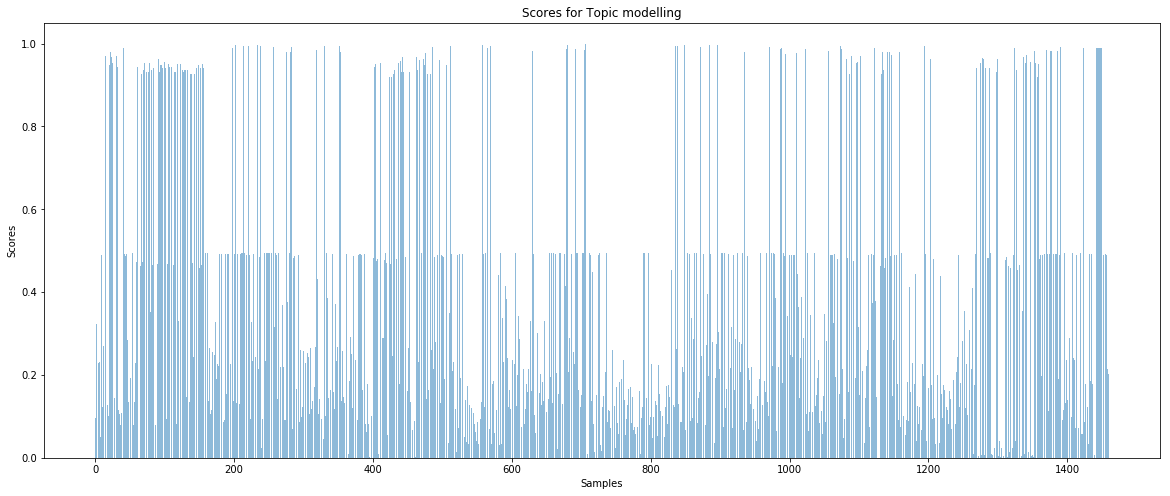

In [65]:

fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Scores for Topic modelling")
ax.set_xlabel("Samples")
ax.set_ylabel("Scores")

plt.bar(range(len(scores_linguistics)),scores_linguistics,  align='center', alpha=0.5)
plt.show

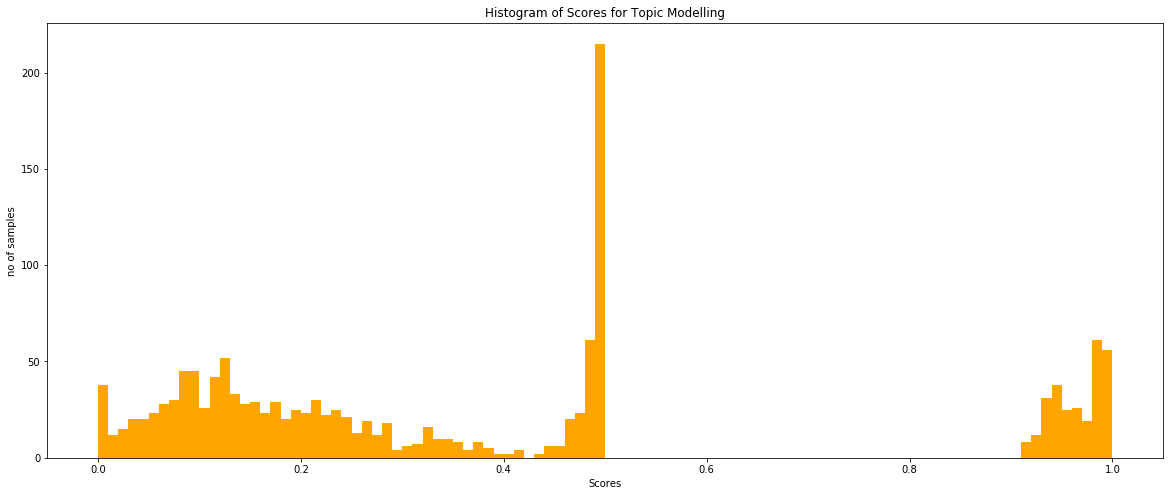

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Histogram of Scores for Topic Modelling")
ax.set_xlabel("Scores")
ax.set_ylabel("no of samples")
N, bins, patches = ax.hist(scores_linguistics, bins=100, color="orange") #initial color of all bins
plt.show()

In [67]:
def get_tupleData(corpus):
    to_num=np.zeros(np.shape(dictionary)[0])
    for i in corpus:
        to_num[i[0]]=i[1]
    
    return to_num
_data = [get_tupleData(corp) for corp in tqdm(corpus_tfidf)]
print(np.shape(_data))

100%|██████████| 1461/1461 [00:07<00:00, 192.37it/s]


(1461, 18481)


In [68]:
# print(np.shape(dictionary)[0])

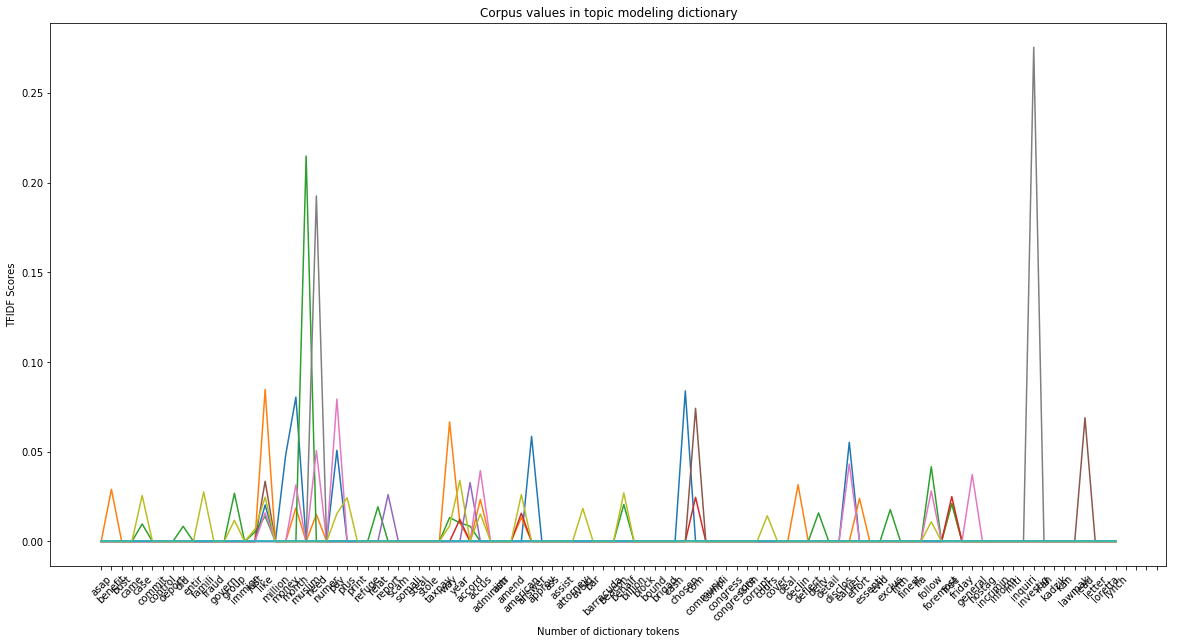

In [69]:
x= [i for i in range(0,np.shape(_data)[1])]
_mat = np.matrix([x for i in range(0,p_data.shape[0])])
import random
idx = random.sample(range(0, np.shape(_data)[0]), 10)
_dict_values = [words for words in dictionary.token2id] 
fig, ax = plt.subplots(figsize=[20,10])
ax.set_title("Corpus values in topic modeling dictionary")
ax.set_xlabel("Number of dictionary tokens")
ax.set_ylabel("TFIDF Scores")
plt.xticks(x, _dict_values[0:100],rotation=45)

plt.plot( _mat[idx,0:100].T,np.matrix(_data)[idx,0:100].T)
plt.show()

In [70]:
# Ranking for Topic modelling
sorted_scores = sorted(enumerate(scores_linguistics), key=lambda x: x[1],reverse=True)
social_ranking = np.zeros(len(scores_linguistics))
i=1
for _zipp in sorted_scores:
    social_ranking[_zipp[0]] = i
    print(_zipp[1])
    i=i+1



1.0
0.999971
0.9977201
0.99739563
0.99733657
0.9972545
0.9972545
0.99719125
0.99716944
0.99716944
0.99698913
0.9969658
0.99628603
0.99622345
0.99622345
0.9962231
0.99605906
0.9955407
0.9953745
0.9953744
0.9951532
0.9951532
0.99506015
0.9948659
0.9948659
0.99465954
0.99455214
0.9944411
0.99432653
0.99412686
0.99376076
0.99369305
0.9936236
0.99340796
0.99340796
0.9932566
0.99277025
0.9925954
0.99231917
0.99231917
0.9922226
0.9920255
0.9919231
0.9917128
0.9916039
0.99149287
0.99114454
0.99114454
0.99077094
0.99076957
0.990506
0.99050534
0.990369
0.9902282
0.9902282
0.9902278
0.9899367
0.9899367
0.98978513
0.9897851
0.98978484
0.98978466
0.98978454
0.98978454
0.98962945
0.98946834
0.9894461
0.98930436
0.9891373
0.9891373
0.98913646
0.98913604
0.9887856
0.9886026
0.98801976
0.9880194
0.9880185
0.98715633
0.9869243
0.9869243
0.98692375
0.98692375
0.98692304
0.9869225
0.98668283
0.9866828
0.986682
0.98668164
0.985911
0.98591083
0.98591
0.9853504
0.98534983
0.9850544
0.98505414
0.9850541
0.985

0.023606535
0.02313612
0.021986052
0.02069801
0.019837918
0.016428886
0.015612629
0.015180639
0.015177435
0.015175517
0.014244897
0.010120535
0.010120403
0.010119601
0.010117773
0.010038462
0.009843083
0.009233572
0.008514963
0.0073799873
0.0073769987
0.006748469
0.0067467787
0.0067466656
0.0067465976
0.0067465543
0.0067461305
0.004339767
0.004338978
0.0043379185
0.0043375115
0.0043371487
0.004337095
0.004336602
0.0025320079
0.002531209
0.0025302365
0.0025300642
0.0025297806
0.0025297052
0.0011263093
0.0011261284
0.0011256356
0.0011255479
0.0011251051
0.0011249016
0.0011244795
0.0011244587
2.2142804e-06
1.3945255e-06
1.2381125e-06
6.4826594e-07
4.5039405e-07
0.0


## Applying various distillation Algorithms on the given document

The distillation algorithms applied are: 
* LDA (Latent Dirichlet allocation), 
* NMF (Non-negative matrix factorization) and 
* SVD (Singular Value decomposition).

### Applying SVD Distillation Algorithm 

In [71]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
from sklearn.decomposition import TruncatedSVD
output_notebook()
plt.rcParams['figure.figsize'] = [20, 10]
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(np.matrix(_data).T)

df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1],_dict_values
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)

show(plot, notebook_handle=True)

Loading BokehJS ...

### Applying LDA Distillation Algorithm

In [72]:
from sklearn.decomposition import LatentDirichletAllocation

def process_sent(sentance):
    return [s for s in sentance.split() if s in _dict_values]
sentences = [" ".join(process_sent(sentence)) for sentence in p_data['stemmed_text'].values]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
data_vectorized = vectorizer.fit_transform(sentences)
_li_features = data_vectorized
print(np.shape(data_vectorized))
lda_model = LatentDirichletAllocation(n_topics=10, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

(1461, 18481)


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [73]:
import pyLDAvis.sklearn
# 
from sklearn.feature_extraction.text import CountVectorizer
plt.rcParams['figure.figsize'] = [10, 5]
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2     -277.601868 -183.507462       1        1  89.920789
9      -10.497002 -102.407166       2        1   1.180791
3     -236.019104   59.109428       3        1   1.147775
0     -178.403427  298.422852       4        1   1.133341
7      302.278137  199.443939       5        1   1.119890
1       86.020744  365.822418       6        1   1.116563
5      -61.279797 -349.847321       7        1   1.104708
8      260.373169  -43.050739       8        1   1.097414
6       34.969627  118.439682       9        1   1.095403
4      203.096527 -282.378357      10        1   1.083326, topic_info=      Category      Freq        Term      Total  loglift  logprob
term                                                             
15350  Default  4.000000      speech   4.000000  30.0000  30.0000
16337  Default  4.000000        term   4.000000  29.0000  29.0000
7849   Default  4.000000        imag   4.000000  28.0000  28.0000
8999   Default  4.000000       known   4.000000  27.0000  27.0000
8461   Default  4.000000        jame   4.000000  26.0000  26.0000
13307  Default  4.000000        read   4.000000  25.0000  25.0000
15748  Default  4.000000      strong   4.000000  24.0000  24.0000
5512   Default  4.000000      expect   4.000000  23.0000  23.0000
15335  Default  4.000000     special   4.000000  22.0000  22.0000
5879   Default  4.000000       final   4.000000  21.0000  21.0000
15181  Default  4.000000     societi   4.000000  20.0000  20.0000
13660  Default  4.000000    research   4.000000  19.0000  19.0000
17863  Default  4.000000        warn   4.000000  18.0000  18.0000
9200   Default  4.000000      latest   4.000000  17.0000  17.0000
5531   Default  4.000000     explain   4.000000  16.0000  16.0000
9733   Default  4.000000      machin   4.000000  15.0000  15.0000
13752  Default  4.000000      reveal   4.000000  14.0000  14.0000
3195   Default  4.000000   communiti   4.000000  13.0000  13.0000
2326   Default  4.000000        came   4.000000  12.0000  12.0000
15550  Default  4.000000   statement   4.000000  11.0000  11.0000
428    Default  4.000000       alleg   4.000000  10.0000  10.0000
8985   Default  4.000000        knew   4.000000   9.0000   9.0000
7562   Default  4.000000        hope   4.000000   8.0000   8.0000
9276   Default  4.000000       learn   4.000000   7.0000   7.0000
17250  Default  4.000000     univers   4.000000   6.0000   6.0000
16230  Default  4.000000         tax   4.000000   5.0000   5.0000
18265  Default  4.000000       wrong   4.000000   4.0000   4.0000
18384  Default  4.000000       young   4.000000   3.0000   3.0000
13158  Default  4.000000        race   4.000000   2.0000   2.0000
8617   Default  4.000000        jone   4.000000   1.0000   1.0000
...        ...       ...         ...        ...      ...      ...
14540  Topic10  0.006901       selon   0.147179   1.4651  -9.8244
1246   Topic10  0.006901       balut   0.147937   1.4600  -9.8244
15291  Topic10  0.006901     soutien   0.147188   1.4650  -9.8244
15217  Topic10  0.006955     solidar   0.587845   0.0882  -9.8165
3473   Topic10  0.006936     corbett   0.447311   0.3587  -9.8193
8501   Topic10  0.006936         jay   1.066723  -0.5105  -9.8193
7193   Topic10  0.006935        hate   4.006439  -1.8339  -9.8194
13916  Topic10  0.006935       robot   1.090312  -0.5325  -9.8194
8042   Topic10  0.006934    industri   4.815272  -2.0180  -9.8197
9967   Topic10  0.006931      market   3.613558  -1.7313  -9.8200
14946  Topic10  0.006930       sioux   1.139173  -0.5770  -9.8201
15055  Topic10  0.006928        slim   0.655183  -0.0242  -9.8205
9964   Topic10  0.006927        mark   3.742386  -1.7670  -9.8207
11846  Topic10  0.006926       paint   2.655375  -1.4239  -9.8207
9681   Topic10  0.006926      luongo   0.448708   0.3541  -9.8207
10136  Topic10  0.006926  mcnaughton   0.398765   0.4720  -9.8208
3751   Topic10  0.006924   

### Applying NMF Distillation Algorithm

In [74]:
# Applying NMF
from sklearn.decomposition import NMF, TruncatedSVD
NUM_TOPICS = 10
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(wordCount_scores)
print(nmf_Z.shape) 


plt.rcParams['figure.figsize'] = [20, 10]
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(np.matrix(nmf_Z))

df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1],range(0,p_data.shape[0])
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

(1461, 10)


### Ranking the articles based on the Topic Modelling

The Articles shown below are sorted by the LDA score in descending order.

In [75]:
# Ranking for Topic modelling
p_data['topic_scores'] = scores_linguistics

topic_SortedDataframe = p_data.sort_values('topic_scores',ascending=False)

topic_SortedDataframe.head(10)

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


uuid  ord_in_thread  \
4928  d3bd2243ef589d3a9769d62036383104d9cedaa4              0   
4979  63e04aeb9b75672802da116a4acfaaae4a11cbc5              0   
7237  b054ceb84bde5b92f2ace65ac1fe231a64b8528d              0   
7200  10fe3b48af2745d753f3bcedd05aa0e1b12b0e93              0   
4953  f6dbabd9d8547f1e178c6dc0a2ca53841105c3cd              0   
934   bc9916cdecdfaf1ee4991002b397cb489be07aec              0   
952   00bbdb926ee71e47369fd87ed17cd8cd8a39b265              0   
2224  e75f1e85aec396a69fcd3ba60a4039f668d0922c              0   
993   4d9b9529cbb864884d975681927f2a22301be427              0   
977   fa858167de1e5b3d01d0e5796daabcc636133a31              0   

                     author                      published  \
4928             Alex Jones  2016-10-27T18:25:37.275+03:00   
4979  Infowars Nightly News  2016-10-28T21:11:57.462+03:00   
7237           Jason Easley  2016-10-29T21:05:49.223+03:00   
7200            Sarah Jones  2016-10-27T20:50:29.628+03:00   
4953            Kit Daniels  2016-10-28T01:12:00.296+03:00   
934                     NaN  2016-10-27T15:12:29.046+03:00   
952                     NaN  2016-10-27T18:45:00.000+03:00   
2224                    NaN  2016-10-31T06:44:00.000+02:00   
993                     NaN  2016-10-28T23:30:00.000+03:00   
977                     NaN  2016-10-28T18:34:47.857+03:00   

                                                  title  \
4928  Democrats Plan To Burn Down U.S. If Trump Elected   
4979               Back Story Of FBI’s Hillary Cover-Up   
7237  Bombshell New Details Destroy Republican Hopes...   
7200  Number Of Accusers Grows To 12, As Former Miss...   
4953  ABC Poll Oversamples Dems by 9%, Claims Hillar...   
934   Biden Blames “Lazy American Women” For The Eco...   
952   Biden Blames “Lazy American Women” For The Eco...   
2224  BREAKING: DOJ FINALLY Secures Warrant To Inspe...   
993   'If Trump loses, I'm grabbing my musket,' form...   
977   'If Trump loses, I'm grabbing my musket,' form...   

                                                   text language  \
4928  Democrats Plan To Burn Down U.S. If Trump Elec...  english   
4979  Back Story Of FBI’s Hillary Cover-Up FBI corru...  english   
7237  Share on Twitter Print This Post \nThe FBI is ...  english   
7200  By Sarah Jones on Thu, Oct 27th, 2016 at 1:41 ...  english   
4953  ABC Poll Oversamples Dems by 9%, Claims Hillar...  english   
934   Email \n\nDemocratic Vice President Joe Biden ...  english   
952   Email \n\nDemocratic Vice President Joe Biden ...  english   
2224  BREAKING: DOJ FINALLY Secures Warrant To Inspe...  english   
993   Email \n\nFormer Illinois congressman and cons...  english   
977   Email \n\nFormer Illinois congressman and cons...  english   

                            crawled          site_url country     ...       \
4928  2016-10-27T18:25:37.275+03:00      infowars.com      US     ...        
4979  2016-10-28T21:11:57.462+03:00      infowars.com      US     ...        
7237  2016-10-29T21:05:49.223+03:00  politicususa.com      US     ...        
7200  2016-10-27T20:50:29.628+03:00  politicususa.com      US     ...        
4953  2016-10-28T01:12:00.296+03:00      infowars.com      US     ...        
934   2016-10-27T15:12:29.046+03:00       awdnews.com      DE     ...        
952   2016-10-27T21:12:32.820+03:00       awdnews.com      DE     ...        
2224  2016-11-02T22:13:26.400+02:00     dailywire.com      US     ...        
993   2016-10-29T16:33:55.081+03:00       awdnews.com      DE     ...        
977   2016-10-28T18:34:47.857+03:00       awdnews.com      DE     ...        

      participants_count likes  comments shares        type  \
4928                   1   539         0    539  conspiracy   
4979                   1   247         0    247  conspiracy   
7237                   1     0         0      0        bias   
7200                   1     0         0      0        bias   
4953                   1     0         0      0  conspiracy   
934    

# Nidhi Jamar - Sentimental Analysis

 ### Parse the dictionary created for Sentimental Analysis and process the text column using genism.
 
The dictionary for sentiment analysis was created manually by referring to many online source:

https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis/data

https://www.kaggle.com/milind81/dictionary-for-sentiment-analysis/version/1

https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

http://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar


Sentimental Anaylsis dictionary link: 
https://drive.google.com/open?id=1GEacqyia6lfIN3jEeN4pYcIDYKrTCtfh


In [76]:
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
sentimental_dict = pd.read_csv('./Sentimental_Analysis_dict.csv')

dictionary = gensim.corpora.Dictionary([[words] for words in sentimental_dict['text'].values])
# dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(1296 unique tokens: ['better', 'tough', 'dull', 'drag', 'weak']...)


#### Print the text column of the dictionary

In [77]:
sentimental_dict['text'].values

array(['better', 'tough', 'dull', ..., 'wow', 'zeal', 'zenith'],
      dtype=object)

## Calculate and visualize the average sentiment of the dataset. 
This helps in understanding the data better. As seen in the below plot, there are many words which are of neutral sentiment.

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
100%|██████████| 1461/1461 [00:07<00:00, 191.16it/s]
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  from ipykernel import kernelapp as app


vishwas  [0.14412114989733069, 0.7060171115674188, 0.14849760438056106]


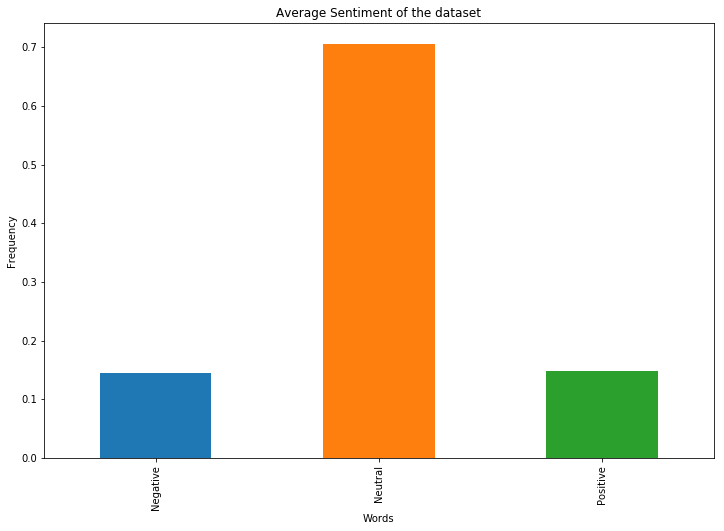

In [78]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return [score['neg'],score['neu'],score['pos']]

sentiments = np.asmatrix([np.asarray(sentiment(c)) for c in tqdm(p_data['processed_text'].values)])
AverageSentiment = np.mean(sentiments,axis=0)[0,:]

print('vishwas ',[AverageSentiment[0,0],AverageSentiment[0,1],AverageSentiment[0,2]])


freq_series = pd.Series.from_array([AverageSentiment[0,0],AverageSentiment[0,1],AverageSentiment[0,2]])


# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Average Sentiment of the dataset')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_xticklabels(['Negative','Neutral','Positive'])
plt.show()

## Histogram for Positive, Negative words in dataset

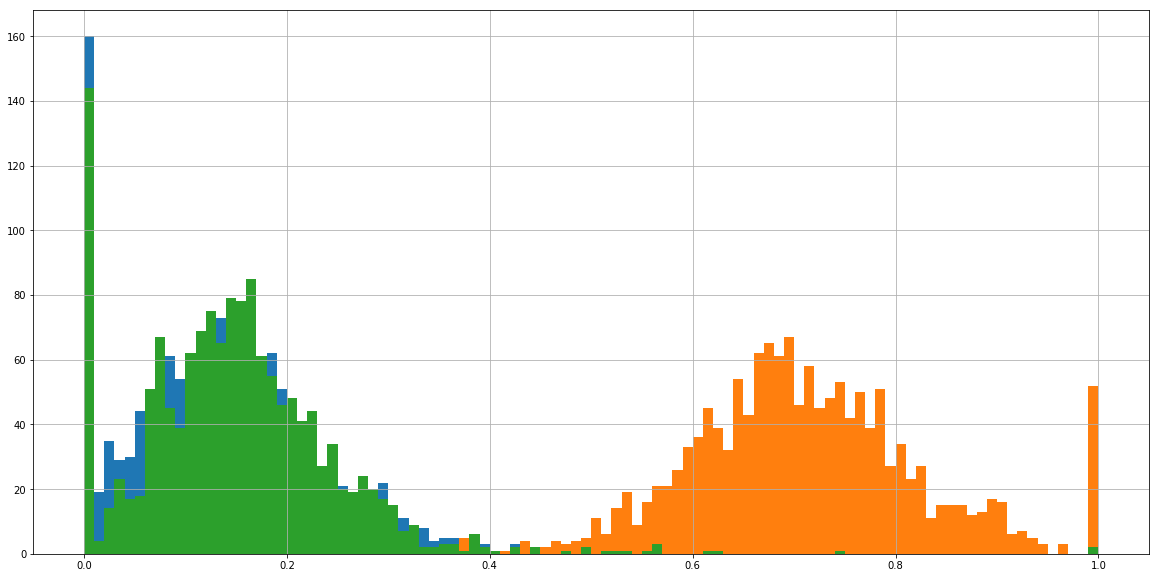

In [79]:
words = ['Negative','Neutral','Positive']
freq_series = pd.DataFrame(sentiments,columns=list(words))

freq_series.columns = words
plt.figure(); 
hist = freq_series.Negative.hist(bins=100).plot()
hist = freq_series.Neutral.hist(bins=100).plot()
hist = freq_series.Positive.hist(bins=100).plot()
plt.show()

#### Building the corpus using doc2bow (Convert document (a list of words) into the bag-of-words format)


In [80]:
# building corpus
processed_docs =  [doc.split() for doc in p_data['stemmed_text']]
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

bow_corpus[0]


[(117, 1), (350, 1), (685, 1), (786, 1), (795, 1), (961, 1), (1117, 1)]

#### Printing the frequency of dictionary words appearing in the article

In [81]:
bow_doc_4310 = bow_corpus[0]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 117 ("bust") appears 1 time.
Word 350 ("fraud") appears 1 time.
Word 685 ("scam") appears 1 time.
Word 786 ("steal") appears 1 time.
Word 795 ("stole") appears 1 time.
Word 961 ("benefit") appears 1 time.
Word 1117 ("like") appears 1 time.


#### Apply TFIDF : Calculated TFIDF score 

In [82]:
# Apply TFIDF Score
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
pprint(corpus_tfidf[0])

[(117, 0.4467821634603637),
 (350, 0.28269534789022693),
 (685, 0.4637456229629847),
 (786, 0.35847834553868674),
 (795, 0.548998628674976),
 (961, 0.2614035993187735),
 (1117, 0.08468161331484823)]


In [83]:
print(sentimental_dict.loc[10]['sentiment'])

negative


#### Convert the TFIDF score based on the sentiment. For positive sentiments, kept the score as positive and for negative sentiment converted the score to negative. This helped in making the model better.


In [84]:
# Convert TFIDF Score based on sentiment
def Senti_multiplier(c):
    to_return=[]
    for _c in c:
        if sentimental_dict.loc[_c[0]]['sentiment'] == 'negative':
            to_return.append(tuple((_c[0],(_c[1]*-1+1)/2)))
        else:
            to_return.append(tuple((_c[0],(_c[1]+1)/2)))
    return to_return
            
        
    
p_corpus_tfidf = [Senti_multiplier(c) for c in corpus_tfidf]
pprint(p_corpus_tfidf[0])

[(117, 0.27660891826981815),
 (350, 0.3586523260548865),
 (685, 0.26812718851850764),
 (786, 0.32076082723065663),
 (795, 0.22550068566251202),
 (961, 0.6307017996593868),
 (1117, 0.5423408066574241)]


#### Using LdaMulticore, generated total score for each topic along with each word and its weightage score.


In [85]:
lda_model = gensim.models.LdaMulticore(p_corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=2)


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum

In [86]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"like" + 0.029*"work" + 0.016*"support" + 0.015*"trump" + 0.014*"good" + 0.012*"free" + 0.012*"right" + 0.011*"clear" + 0.011*"better" + 0.010*"love"
Topic: 1 
Words: 0.031*"like" + 0.024*"trump" + 0.020*"work" + 0.018*"support" + 0.015*"lead" + 0.014*"good" + 0.014*"right" + 0.013*"best" + 0.011*"protect" + 0.011*"won"
Topic: 2 
Words: 0.028*"support" + 0.028*"trump" + 0.020*"like" + 0.019*"right" + 0.015*"win" + 0.013*"work" + 0.012*"good" + 0.011*"clear" + 0.011*"freedom" + 0.009*"lead"
Topic: 3 
Words: 0.037*"right" + 0.024*"like" + 0.016*"work" + 0.011*"support" + 0.011*"trump" + 0.010*"wonder" + 0.010*"good" + 0.010*"fail" + 0.009*"proud" + 0.009*"destroy"
Topic: 4 
Words: 0.028*"right" + 0.023*"free" + 0.021*"trump" + 0.019*"great" + 0.019*"well" + 0.016*"support" + 0.015*"like" + 0.015*"work" + 0.015*"better" + 0.012*"good"
Topic: 5 
Words: 0.027*"like" + 0.019*"clear" + 0.019*"lead" + 0.018*"trump" + 0.018*"right" + 0.017*"work" + 0.013*"support" + 0.011

In [87]:
for index, score in sorted(lda_model[p_corpus_tfidf[1000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.7995042204856873	 
Topic: 0.028*"support" + 0.028*"trump" + 0.020*"like" + 0.019*"right" + 0.015*"win" + 0.013*"work" + 0.012*"good" + 0.011*"clear" + 0.011*"freedom" + 0.009*"lead"

Score: 0.022279979661107063	 
Topic: 0.031*"like" + 0.024*"trump" + 0.020*"work" + 0.018*"support" + 0.015*"lead" + 0.014*"good" + 0.014*"right" + 0.013*"best" + 0.011*"protect" + 0.011*"won"

Score: 0.022279173135757446	 
Topic: 0.062*"trump" + 0.027*"like" + 0.025*"right" + 0.022*"win" + 0.017*"work" + 0.017*"good" + 0.015*"support" + 0.014*"lead" + 0.014*"won" + 0.011*"best"

Score: 0.022278733551502228	 
Topic: 0.028*"right" + 0.023*"free" + 0.021*"trump" + 0.019*"great" + 0.019*"well" + 0.016*"support" + 0.015*"like" + 0.015*"work" + 0.015*"better" + 0.012*"good"

Score: 0.022277938202023506	 
Topic: 0.018*"like" + 0.016*"trump" + 0.014*"support" + 0.013*"right" + 0.012*"work" + 0.011*"good" + 0.010*"won" + 0.009*"attack" + 0.009*"better" + 0.009*"strong"

Score: 0.02227751351892948	 
Topic:

#### Calculate score per corpus

In [88]:
def getScorePerCorpus(corpus):
    global lda_model
    summ = []
    for index, score in sorted(lda_model_tfidf[corpus], key=lambda tup: -1*tup[1]):
        summ .append(score)
    return np.median(summ)

scores_sentiment = [getScorePerCorpus(corp) for corp in p_corpus_tfidf]
scores_sentiment = scores_sentiment-np.min(scores_sentiment)
scores_sentiment = scores_sentiment/np.max(scores_sentiment)
    
# scores_linguistics = [getscore(doc) for doc in bow_corpus ]

#### Visualize the Scores for sentimental using samples and the corresponding scores to understand the data.


<function matplotlib.pyplot.show(*args, **kw)>

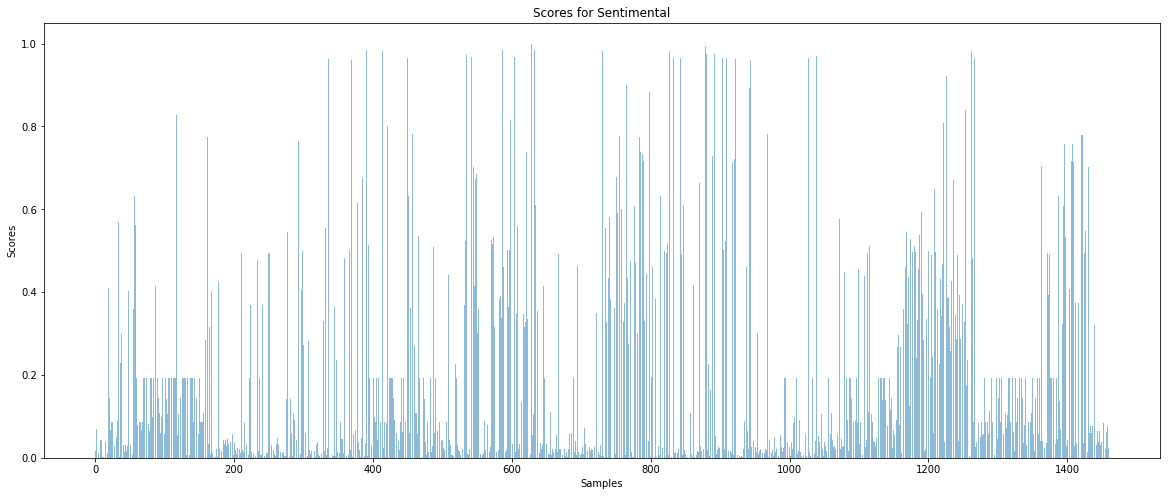

In [89]:
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Scores for Sentimental")
ax.set_xlabel("Samples")
ax.set_ylabel("Scores")

plt.bar(range(len(scores_sentiment)),scores_sentiment,  align='center', alpha=0.5)
plt.show

#### Histogram of Scores for Sentimental which shows the frequency distribution of samples for the scores.


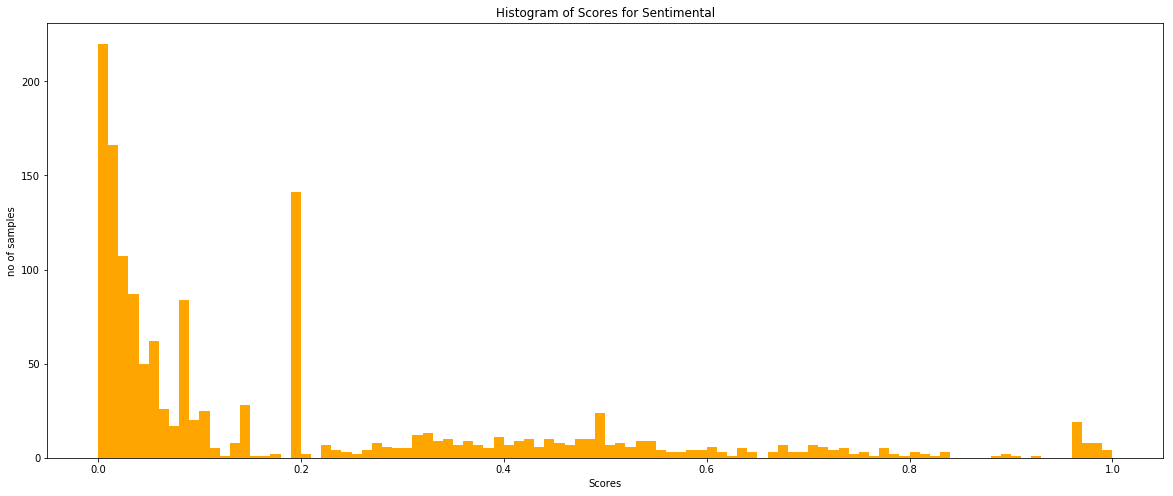

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Histogram of Scores for Sentimental")
ax.set_xlabel("Scores")
ax.set_ylabel("no of samples")
N, bins, patches = ax.hist(scores_sentiment, bins=100, color="orange") #initial color of all bins
plt.show()

### Apply Word2Vec

In [91]:
_dict_values = sentimental_dict['text'].values
def process_sent(sentance):
    return [s for s in sentance.split() if s in _dict_values]
sentences = [process_sent(sentence) for sentence in tqdm(p_data['stemmed_text'].values)]


from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(sentences, min_count=1)
words = list(model.wv.vocab)
print(words[0:10])

100%|██████████| 1461/1461 [00:14<00:00, 99.76it/s] 


['bust', 'steal', 'stole', 'benefit', 'like', 'fraud', 'scam', 'corrupt', 'finest', 'lead']


## Apply Distillation Algorithms

### 1. Apply two dimensional PCA on the sentimental corpus using LDA

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


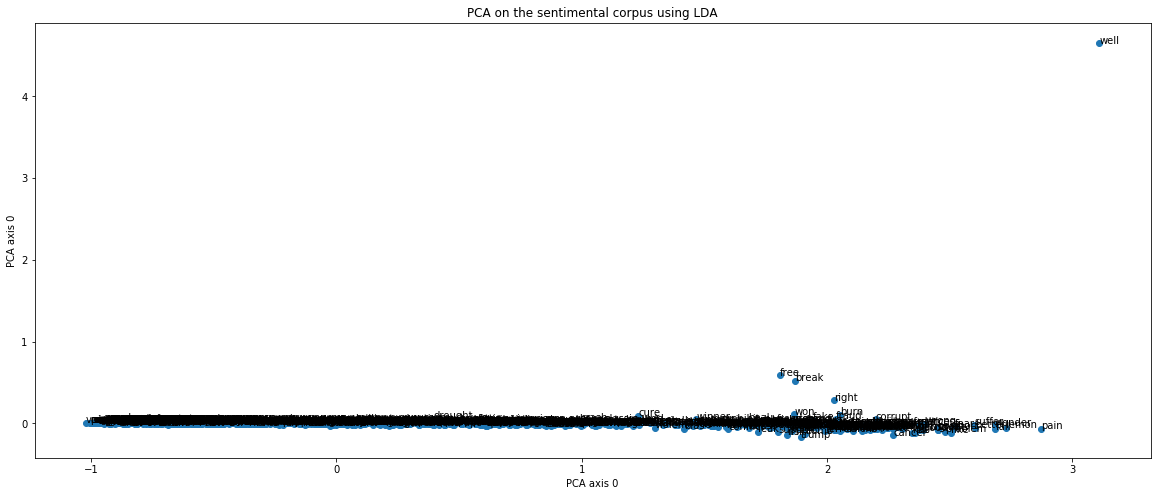

In [92]:
# fit a 2d PCA model to the vectors
X = model[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection

fig, ax = pyplot.subplots(figsize=[20,8])
ax.set_title("PCA on the sentimental corpus using LDA")
ax.set_xlabel("PCA axis 0")
ax.set_ylabel("PCA axis 0")

# plt.plot( _mat[idx,0:100].T,np.matrix(_data)[idx,0:100].T)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### 2. Apply SVD (Singular Value Decomposition)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
  
# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True,smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=100,         # num dimensions
                         algorithm='randomized',
                         n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
sentences_tostr = [" ".join(i) for i in sentences]
svd_matrix = svd_transformer.fit_transform(sentences_tostr)
print('The SVD Matrix can be used learn the output {}'.format(np.shape(svd_matrix)))

The SVD Matrix can be used learn the output (1461, 100)


### 3. Applied PCA on the sentimental corpus from LSA (Latent semantic analysis)

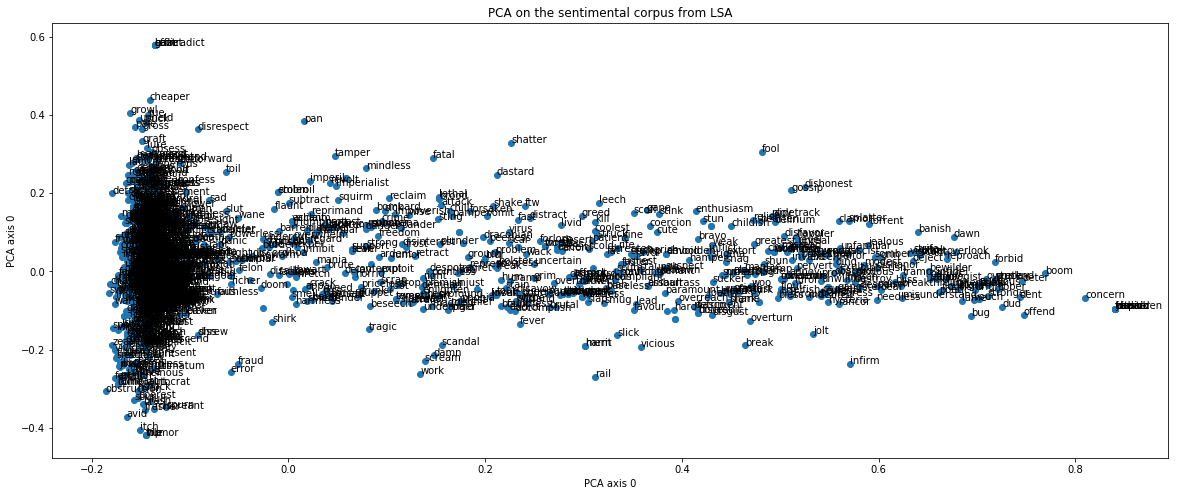

In [94]:
pca = PCA(n_components=2)
result = pca.fit_transform(svd_matrix)
# create a scatter plot of the projection

fig, ax = pyplot.subplots(figsize=[20,8])
ax.set_title("PCA on the sentimental corpus from LSA")
ax.set_xlabel("PCA axis 0")
ax.set_ylabel("PCA axis 0")
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Calculate and visualize the LSI value for ten random samples

(1461, 100)


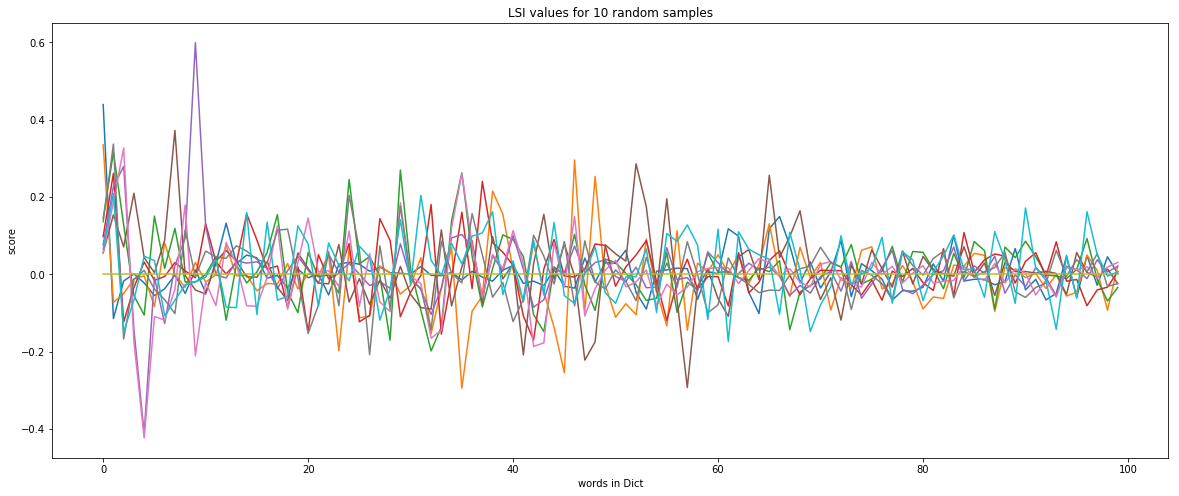

In [95]:
x= [i for i in range(0,100)]
_mat = np.matrix([x for i in range(0,p_data.shape[0])])
print(np.shape(_mat))
import random
idx = random.sample(range(0, np.shape(svd_matrix)[0]), 10)
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("LSI values for 10 random samples")
ax.set_xlabel("words in Dict")
ax.set_ylabel("score")
plt.plot( _mat[idx,:].T,svd_matrix[idx,:].T)
plt.show()

### Applying LDA (Latent Dirichlet Allocation)

In [96]:
from sklearn.decomposition import LatentDirichletAllocation

def process_sent(sentance):
    return [s for s in sentance.split() if s in _dict_values]
sentences = [" ".join(process_sent(sentence)) for sentence in p_data['stemmed_text'].values]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
data_vectorized = vectorizer.fit_transform(sentences)
_se_features = data_vectorized
print(np.shape(data_vectorized))
lda_model = LatentDirichletAllocation(n_topics=10, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

(1461, 1294)


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [97]:
import pyLDAvis.sklearn
# 
from sklearn.feature_extraction.text import CountVectorizer
plt.rcParams['figure.figsize'] = [10, 5]
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4     -110.856468  -75.609932       1        1  76.328769
5       64.633858  -27.565969       2        1   3.095475
2     -100.875908   31.184946       3        1   2.806939
3      -19.190495  -60.160591       4        1   2.697203
0      -15.601872 -153.013992       5        1   2.676408
7      155.543961  -19.736923       6        1   2.654488
1       86.743553 -120.584511       7        1   2.477414
9       88.845291   73.720810       8        1   2.435209
6       -5.426507   28.716936       9        1   2.432387
8      -16.267231  119.346687      10        1   2.395708, topic_info=     Category       Freq      Term       Total  loglift  logprob
term                                                            
1257  Default  15.000000      well   15.000000  30.0000  30.0000
196   Default  23.000000   concern   23.000000  29.0000  29.0000
839   Default  23.000000   protest   23.000000  28.0000  28.0000
456   Default  15.000000     fraud   15.000000  27.0000  27.0000
122   Default  19.000000     break   19.000000  26.0000  26.0000
529   Default  13.000000      hack   13.000000  25.0000  25.0000
1144  Default  19.000000    terror   19.000000  24.0000  24.0000
653   Default   9.000000      liar    9.000000  23.0000  23.0000
830   Default  12.000000  progress   12.000000  22.0000  22.0000
458   Default  23.000000      free   23.000000  21.0000  21.0000
460   Default  11.000000   freedom   11.000000  20.0000  20.0000
200   Default  14.000000  conflict   14.000000  19.0000  19.0000
1153  Default  12.000000  threaten   12.000000  18.0000  18.0000
256   Default  10.000000    defeat   10.000000  17.0000  17.0000
222   Default  18.000000    critic   18.000000  16.0000  16.0000
831   Default   6.000000  prohibit    6.000000  15.0000  15.0000
48    Default   8.000000     award    8.000000  14.0000  14.0000
197   Default   7.000000   condemn    7.000000  13.0000  13.0000
422   Default   5.000000   fiction    5.000000  12.0000  12.0000
107   Default   6.000000     bonus    6.000000  11.0000  11.0000
1108  Default   9.000000    suffer    9.000000  10.0000  10.0000
326   Default   5.000000   disturb    5.000000   9.0000   9.0000
1267  Default   7.000000    winner    7.000000   8.0000   8.0000
268   Default   4.000000  demolish    4.000000   7.0000   7.0000
791   Default   4.000000   patriot    4.000000   6.0000   6.0000
941   Default  13.000000   scandal   13.000000   5.0000   5.0000
547   Default   3.000000     haunt    3.000000   4.0000   4.0000
351   Default   3.000000   earnest    3.000000   3.0000   3.0000
131   Default   5.000000     broke    5.000000   2.0000   2.0000
40    Default   4.000000  assassin    4.000000   1.0000   1.0000
...       ...        ...       ...         ...      ...      ...
756   Topic10   0.076230     outdo    0.823367   1.3518  -7.1821
407   Topic10   0.076227   fatuous    0.831273   1.3422  -7.1821
1134  Topic10   0.077855      tank    4.235999  -0.2650  -7.1610
1071  Topic10   0.076641      stew    1.356346   0.8581  -7.1767
496   Topic10   0.076232      glib    0.848365   1.3220  -7.1821
165   Topic10   0.076214   cheater    0.832784   1.3403  -7.1823
1186  Topic10   0.077038     trump  156.830326  -3.8871  -7.1716
831   Topic10   0.076998  prohibit    6.422244  -0.6922  -7.1721
671   Topic10   0.076886      love   16.883521  -1.6603  -7.1735
657   Topic10   0.076714      like   65.584527  -3.0195  -7.1758
953   Topic10   0.076603     scrap    2.636730   0.1928  -7.1772
375   Topic10   0.076598     excel    4.188315  -0.2700  -7.1773
108   Topic10   0.076574      boom    1.481225   0.7691  -7.1776
1012  Topic10   0.076525     smart    5.271835  -0.5010  -7.1782
232   Topic10   0.076518      cure    3.331055  -0.0420  -7.1783
200   Topic10   0.076510  conflict   14.410936  -1.5068  -7.1784
839   Topic10   0.076503   protest   23.575212  -1.9991  -7.1785
1123  Topic

## Ranking the articles based on the Sentimental compound Score

The score is caculated based on Sentimental analysis. The score is a compounded score of all the emotions, meaning positive score shows overall happiness, negative score represents, over all sadness.

The Articles shown below are sorted by the score in descending order (Greater Overall happiness score).

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']

p_data['sentiments'] = [sentiment(c) for c in tqdm(p_data['processed_text'].values)]

sentiment_SortedDataframe = p_data.sort_values('sentiments',ascending=False)

sentiment_SortedDataframe.head(10)

100%|██████████| 1461/1461 [00:07<00:00, 203.59it/s]
/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


uuid  ord_in_thread  \
8003   82678242567f585a51c3fed5802eb2490ca0e7f3              0   
8001   10ef345fa845b3adb2a73512a3d0269f5ab4ee74              0   
2358   0ace0942c57de9280ffb882a1bff4b9efcdf33db              0   
4996   ae36a033bcf20052b33a5288e1d6b4328decd7a6              0   
8030   cbdeb9e6e41614537730a18a42d2a4e6bc4f37de              0   
4995   d49cbde2bf4a4586fe87ab0d32a6807cce12bb14              0   
12673  1cb841056801023687781d447543bfe28fcb1a3c              0   
12665  48255e4b9d0c1e44ff50bf62d58c6086afab8b96              0   
7963   43d156d23a791d4998e064521bc75d9bcf7f075e              0   
8019   5d1d650db943583d0cc0114a2e9eb38807f74876              0   

                 author                      published  \
8003    Roosh Valizadeh  2016-11-14T20:01:25.101+02:00   
8001       Aaron Clarey  2016-11-13T19:09:28.982+02:00   
2358              Staff  2016-11-15T21:26:00.000+02:00   
4996   Allen Mendenhall  2016-10-29T02:08:58.551+03:00   
8030     Ness Nomadison  2016-11-21T23:57:51.289+02:00   
4995        Kit Daniels  2016-10-29T01:07:07.767+03:00   
12673     Vanessa Frank  2016-10-27T05:07:11.945+03:00   
12665     Vanessa Frank  2016-10-27T04:38:45.701+03:00   
7963       Troy Francis  2016-11-02T18:01:28.236+02:00   
8019      William Adams  2016-11-18T20:01:15.594+02:00   

                                                   title  \
8003                        The Dangers Of Romantic Love   
8001   Buzz Aldrin Is A Warning Of How Success Can Le...   
2358   A Way Forward to Liberation for all Peoples: A...   
4996                                  Ideas Make Us Rich   
8030   8 Reasons Why You Should Try Photography As A ...   
4995   Britain Should Embrace Unilateral Free Trade R...   
12673               Show biz: Business and breakthroughs   
12665               Show biz: Business and breakthroughs   
7963              5 Habits All Successful Seducers Share   
8019                     What Modern South Korea Is Like   

                                                    text language  \
8003   Since we were children, we have been bombarded...  english   
8001     Buzz Aldrin Is A Warning Of How Success Can ...  english   
2358   30 Views Share: \nDr. David Duke offers a New ...  english   
4996   Image Credits: flickr, 9731367@N02 . \nThe fol...  english   
8030   Submit Home This Month Popular 8 Reasons Why Y...  english   
4995   Britain Should Embrace Unilateral Free Trade R...  english   
12673  Show biz: Business and breakthroughs Exclusive...  english   
12665  Show biz: Business and breakthroughs Exclusive...  english   
7963   Whether you are looking to attract a long-term...  english   
8019   Over the last decades, South Korea has emerged...  english   

                             crawled           site_url country    ...      \
8003   2016-11-14T20:01:25.101+02:00  returnofkings.com      US    ...       
8001   2016-11-13T19:09:28.982+02:00  returnofkings.com      US    ...       
2358   2016-11-16T03:42:35.599+02:00      davidduke.com      US    ...       
4996   2016-10-29T02:08:58.551+03:00       infowars.com      US    ...       
8030   2016-11-21T23:57:51.289+02:00  returnofkings.com      US    ...       
4995   2016-10-29T01:07:07.767+03:00       infowars.com      US    ...       
12673  2016-10-27T05:07:11.945+03:00            wnd.com      GB    ...       
12665  2016-10-27T04:38:45.701+03:00            wnd.com      GB    ...       
7963   2016-11-02T18:01:28.236+02:00  returnofkings.com      US    ...       
8019   2016-11-18T20:01:15.594+02:00  returnofkings.com      US    ...       

       likes comments  shares        type  \
8003       0        0       0        hate   
8001       0        0       0        hate   
2358       0        0       0        hate   
4996      26        0      26  conspiracy   
8030       0        0       0        hate   
4995      21        0      21  conspiracy   
12673      0        0       0        bias   
12665      0        0       0        

### Inference
- Sentiment Analysis is one of the important factors to understand and determine the fakeness of the news artcles.
- The considered kaggle dataset for "Fake news" has many parameters which will help us in determining if a news is fake or real.
- Sentimental Analaysis, Political Affiliation, Topic Features and the social media post based together will help in determining if the news is fake or not.

### References
Below links were very useful in understanding NLP and performing the given tasks:

https://likegeeks.com/nlp-tutorial-using-python-nltk/ 

https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184 

https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python

https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis

https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f


### Generate LDA score for each article of the news dataset and generated polynomial equation for the all factors.


In [99]:
from IPython.display import HTML, display
import tabulate

pa_weight = 0.25
sc_weight = 0.25
sa_weight = 0.30
li_weight = 0.20

num_of_Samples =10
import random
samples = random.sample(range(0, p_data.shape[0]), num_of_Samples)

tab_data = []
tab_data.append(["Random Samples","Political Weight","Political Score","Social Weight","Social Score","Sentimental Weight","Sentimental Score","Linguistic Weight","Linguistic Score"])
for i in samples:
    tab_data.append(['Sample-{}'.format(i),pa_weight,np.around(score_pa[i],4),sc_weight,np.around(score_Social[i],4),sa_weight,np.around(scores_sentiment[i],4),li_weight,np.around(scores_linguistics[i],4)])

display(HTML(tabulate.tabulate(tab_data, tablefmt='html')))

In [100]:
tab_data = []
tab_data.append(["Random Samples","Polynomial"])
for i in samples:
    tab_data.append(['Sample-{}'.format(i)," [PA]{}*{} + [SC]{}*{} + [SA]{}*{} + [LI]{}*{} = {}".format(pa_weight,score_pa[i],sc_weight,score_Social[i],sa_weight,scores_sentiment[i],li_weight,scores_linguistics[i],np.around(pa_weight*score_pa[i]+sc_weight*score_Social[i]+sa_weight*scores_sentiment[i]+li_weight*scores_linguistics[i],4))])

display(HTML(tabulate.tabulate(tab_data, tablefmt='html')))

### Calculate Final Score by including all 4 factors

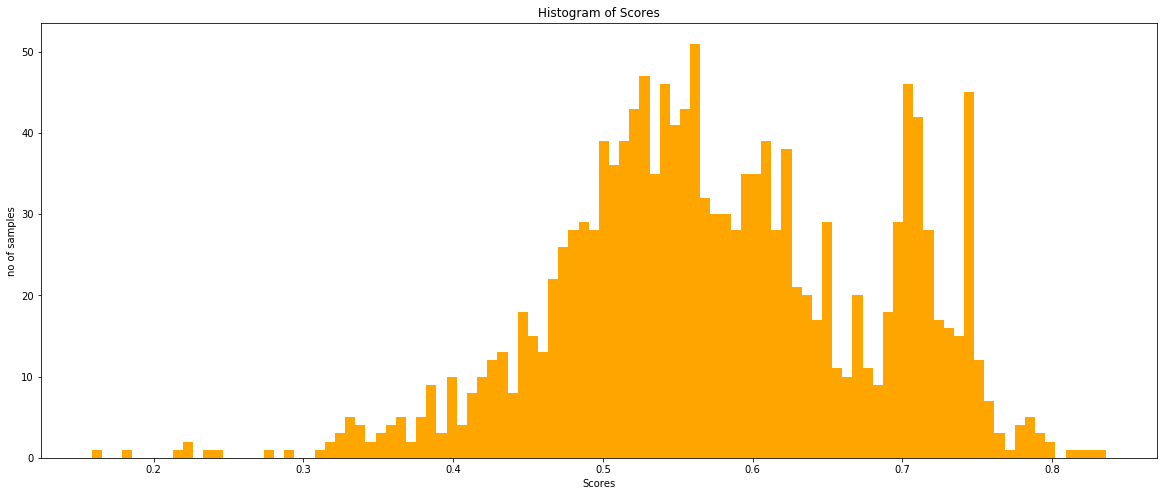

In [101]:
Final_score  = score_pa *pa_weight+sc_weight*score_Social+sa_weight*scores_sentiment+li_weight *scores_linguistics

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[20,8])
ax.set_title("Histogram of Scores")
ax.set_xlabel("Scores")
ax.set_ylabel("no of samples")
N, bins, patches = ax.hist(Final_score, bins=100, color="orange") #initial color of all bins
plt.show()

## Entire Team Contribution 

We Seekers, worked as team to:
- Decide on the dataset – Kaggle’s Fake news dataset
- Identify 4 important factors Political affiliation, Sentimental analysis, Linguistic based and Post based/ Social media activities based.
- To enrich the data, tokenize, stemming and lemmatization on the text column in the fake news dataset, we used NLTK. Stemming and Lemmatization is done only for sentiment analysis and linguistic based factors.
- To build the corpus, we used Gensim
- To remove stop words, special characters, punctuation and to convert to lower case NLTK’s stop-word list is used.
- For political affiliation and social media activities based, TF – IDF scores are used to calculate the cosine similarity between words in the text column of the dataset and the dictionary.
- We have applied classification algorithms like Logistic Regression, Naïve Bayes and Random Forest twice on the dataset. First time we applied to the original fake news dataset and again to the enriched fake news dataset i.e. along with the original features the dataset now has an extra feature named ‘Processed_text’ which is basically text column in the fake news dataset after removing stop words, special characters and punctuation.

### Applying classification on amalgamated results 

In [102]:
from sklearn.model_selection import train_test_split

X_data = np.zeros([np.shape(_pa_features)[0],np.shape(_pa_features)[1]+np.shape(_sc_features)[1]+np.shape(_se_features)[1]+np.shape(_li_features)[1]])
X_data[:,0:np.shape(_pa_features)[1]] = _pa_features
X_data[:,np.shape(_pa_features)[1]:np.shape(_pa_features)[1]+np.shape(_sc_features)[1]] = _sc_features
X_data[:,np.shape(_pa_features)[1]:np.shape(_pa_features)[1]+np.shape(_sc_features)[1]] = _sc_features
_temp = list(p_data['type'].unique())
Y_data = [_temp.index(_type) for _type in p_data['type']]


### 1. Apply Logitistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.15, random_state=46)
clf = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)
predict_proba = clf.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc*100))
print('Confusion Matrix : {}'.format(confusion_matrix(y_test, y_pred)*100))
print(np.shape(predict_proba))

Accuracy : 31.818181818181817
Confusion Matrix : [[6400    0    0    0    0    0    0]
 [6800  600    0    0    0    0    0]
 [ 500    0    0    0    0    0    0]
 [ 700    0    0    0    0    0    0]
 [2900    0    0    0    0    0    0]
 [1600    0    0    0    0    0    0]
 [2300  200    0    0    0    0    0]]
(220, 7)


In [104]:
# Print unique type column values
p_data['type'].unique()
data[data['type']!='bs']['type']
print(predict_proba[0, :])
print(p_data['type'].unique())

[0.31066098 0.28943738 0.01131005 0.07522964 0.16654932 0.06883181
 0.07798083]
['bias' 'conspiracy' 'fake' 'satire' 'hate' 'junksci' 'state']


## Percentage of Truth
- Our dataset contains various categories or types like ‘bias', 'conspiracy', 'fake', 'satire', 'hate', 'junksci' and 'state'. 
- Each article belong to any one of the above types based on the highest weightage of the types. 
- Percentage of truth of any article means how much percent of each of the above types is there in that specific article. 
- For example, we have calculated the percentage of truth for the 0th article in the dataset and we have found that this article is [31% bias, 28.9% conspiracy, 1.1% fake, 7.5% satire, 16.7% hate, 6.9% junksci, 7.8% state].

### Visualize Percentage of Truth for 0th article

(220,)
[0.31066098 0.28943738 0.01131005 0.07522964 0.16654932 0.06883181
 0.07798083]


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  after removing the cwd from sys.path.


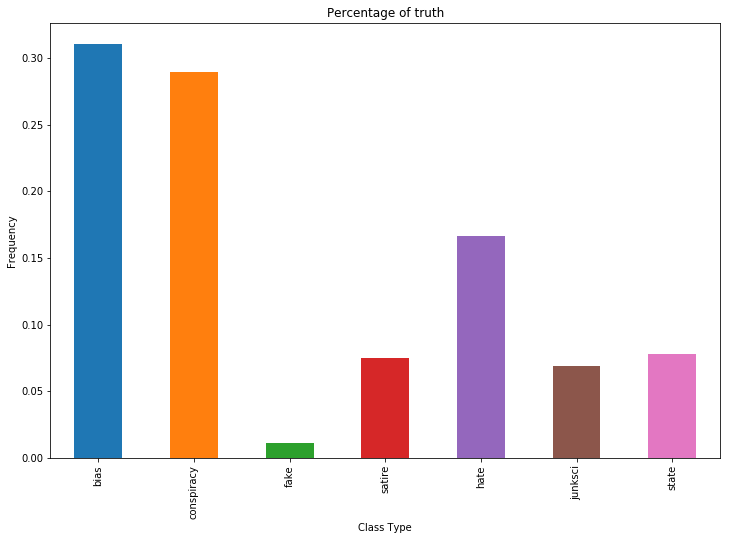

In [105]:
print(np.shape(y_test))
print(predict_proba[0, :])

freq_series = pd.Series.from_array(predict_proba[0,:])

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()


#### From the above graph we can see that the 0th article has more weightage of the "bias" type.

### Visualize Percentage of Truth for 110th article

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """Entry point for launching an IPython kernel.


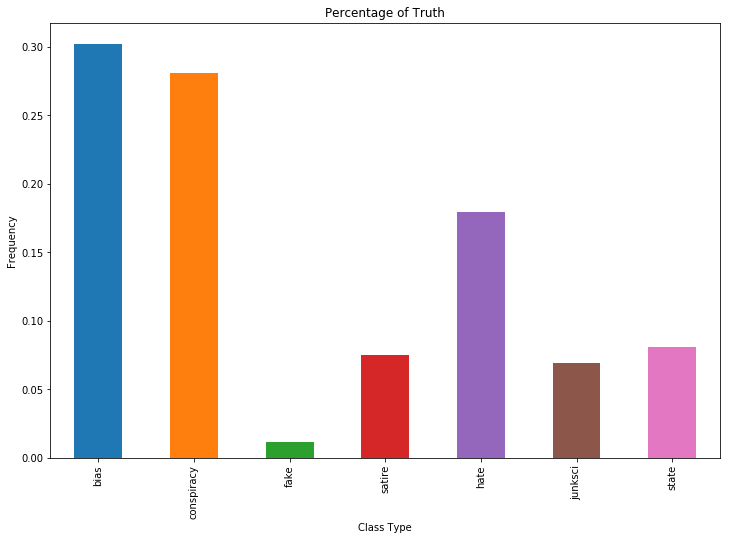

In [106]:
freq_series = pd.Series.from_array(predict_proba[110,:])

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 110th article has more weightage of the "bias" type.

### 2. Apply Naive Bayes Classifier

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(p_data['processed_text'].values, p_data['type'].values, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)*100))
print('Confusion Matrix : {}'.format(confusion_matrix(y_test, y_pred)))

Accuracy : 54.644808743169406
Confusion Matrix : [[108   7   0   0   0   0   0]
 [ 37  64   0   1   0   0   0]
 [  5   1   0   0   0   0   0]
 [ 35   7   0  23   0   0   0]
 [  9   6   0   0   5   0   0]
 [ 24   1   0   0   0   0   0]
 [  8  25   0   0   0   0   0]]


### Visualize Percentage of Truth for 0th article

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


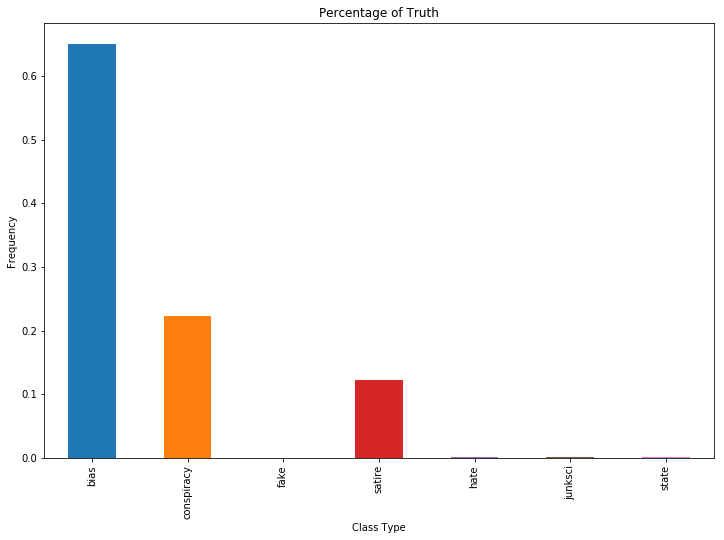

In [108]:
predict_proba = clf.predict_proba(X_test_tfidf)
freq_series = pd.Series.from_array(predict_proba[0,:])
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 0th article has more weightage of the "bias" type.

### Visualize Percentage of Truth for 110th article

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


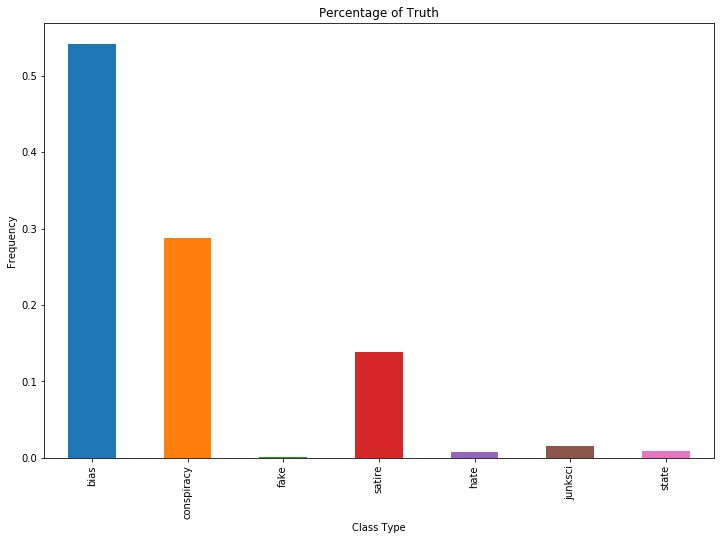

In [109]:
predict_proba = clf.predict_proba(X_test_tfidf)
freq_series = pd.Series.from_array(predict_proba[110,:])
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 110th article has more weightage of the "bias" type.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

_labels = list(p_data['type'].unique())
labels = [_labels.index(_type) for _type in p_data['type'].values]

X_train, X_test, y_train, y_test = train_test_split(p_data['processed_text'].values, labels, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [111]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0) 
regressor.fit(X_train_tfidf, y_train) 
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = regressor.predict(X_test_tfidf)
print('Accuracy : {}'.format(accuracy_score(y_test, np.around(y_pred).astype('uint'))*100))
print('Confusion Matrix : {}'.format(confusion_matrix(y_test, np.around(y_pred).astype('uint'))))

Accuracy : 53.00546448087432
Confusion Matrix : [[45 52 17  0  1  0  0]
 [ 7 70 22  3  0  0  0]
 [ 1  1  3  1  0  0  0]
 [ 0  5 12  8  0  0  0]
 [ 1 13 14 16 21  0  0]
 [ 0  0  2  0  1 17  0]
 [ 0  1  0  0  1  1 30]]


/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


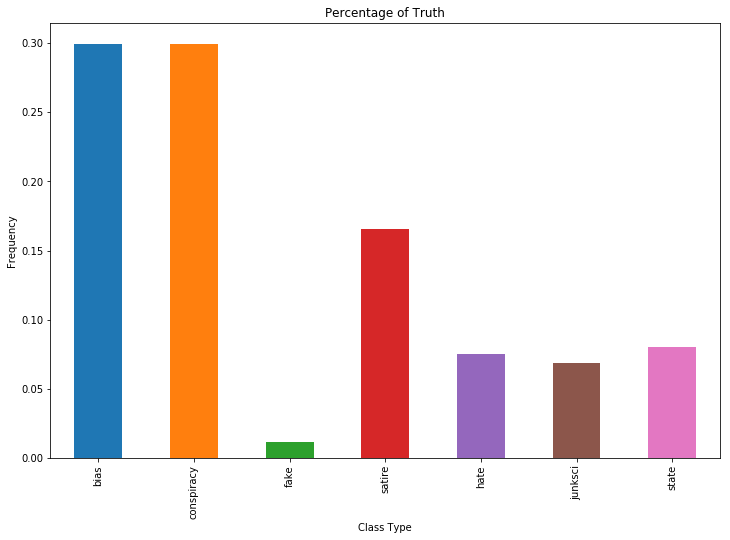

In [112]:
predict_proba = clf.predict_proba(np.around(X_test_tfidf).astype('uint'))
freq_series = pd.Series.from_array(predict_proba[0,:])

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 0th article has similar weightage of the "bias" and "conspiracy" type.

### 3. Apply Random Forest 

In [113]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train_tfidf, y_train)  
y_pred = regressor.predict(X_test_tfidf)
print('Accuracy : {}'.format(accuracy_score(y_test, np.around(y_pred).astype('uint'))*100))
print('Confusion Matrix : {}'.format(confusion_matrix(y_test, np.around(y_pred).astype('uint'))))

Accuracy : 53.00546448087432
Confusion Matrix : [[45 52 17  0  1  0  0]
 [ 7 70 22  3  0  0  0]
 [ 1  1  3  1  0  0  0]
 [ 0  5 12  8  0  0  0]
 [ 1 13 14 16 21  0  0]
 [ 0  0  2  0  1 17  0]
 [ 0  1  0  0  1  1 30]]


## Entire Team Contribution 

### Applying classificaiton algorithms on complete text vs amalgamated features

### Apply TfidfVectorizer

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(p_data['processed_text'].values).toarray()
labels = p_data['type'].values
features.shape

(1461, 10781)

### 1. Apply Naive Bayes Classifier

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(p_data['processed_text'].values, p_data['type'].values, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [116]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)*100))
print('Confusion Matrix : {}'.format(confusion_matrix(y_test, y_pred)))

Accuracy : 54.644808743169406
Confusion Matrix : [[108   7   0   0   0   0   0]
 [ 37  64   0   1   0   0   0]
 [  5   1   0   0   0   0   0]
 [ 35   7   0  23   0   0   0]
 [  9   6   0   0   5   0   0]
 [ 24   1   0   0   0   0   0]
 [  8  25   0   0   0   0   0]]


### Visualize Percentage of Truth for 0th article

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


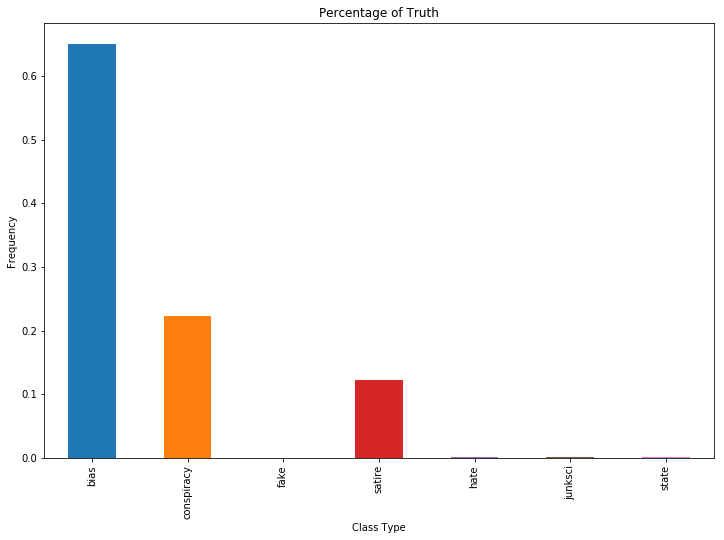

In [117]:
predict_proba = clf.predict_proba(X_test_tfidf)
freq_series = pd.Series.from_array(predict_proba[0,:])

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 0th article has more weightage of the "bias" type.

### Visualize Percentage of Truth for 110th article

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


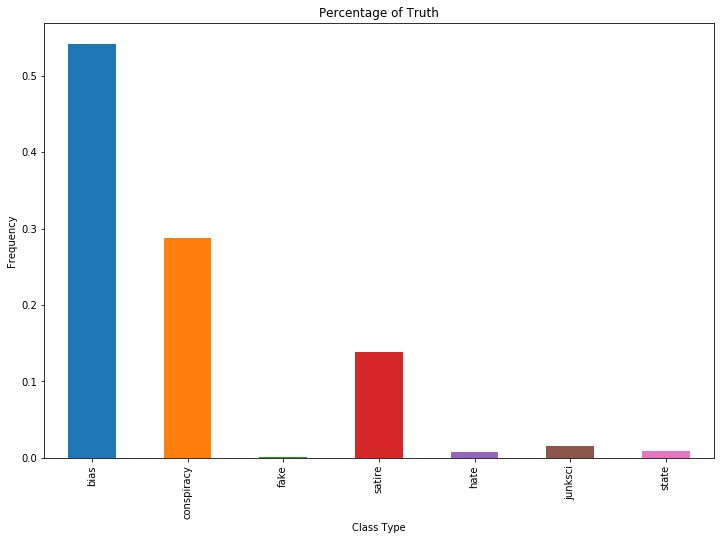

In [118]:
predict_proba = clf.predict_proba(X_test_tfidf)
freq_series = pd.Series.from_array(predict_proba[110,:])

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 110th article has more weightage of the "bias" type.

### 2. Apply Logistic Regression

In [119]:
clf = LogisticRegression(random_state=1, solver='newton-cg',multi_class='multinomial').fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc*100))
print('Confusion Matrix : {}'.format(confusion_matrix(y_test, y_pred)*100))

Accuracy : 66.39344262295081
Confusion Matrix : [[8200 2900    0  400    0    0    0]
 [1000 8700    0  400  100    0    0]
 [ 300  300    0    0    0    0    0]
 [1200  700    0 4500    0    0  100]
 [ 200  600    0  400  800    0    0]
 [1000  800    0  400    0  300    0]
 [ 300 1200    0    0    0    0 1800]]


### Visualize Percentage of Truth for 0th article

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


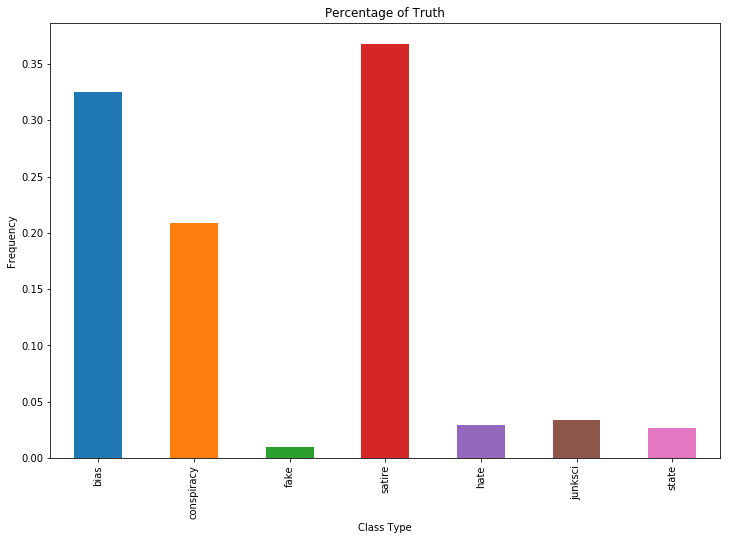

In [120]:
predict_proba = clf.predict_proba(X_test_tfidf)
freq_series = pd.Series.from_array(predict_proba[0,:])

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 0th article has more weightage of the "satire" type.

### Visualize Percentage of Truth for 110th article

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


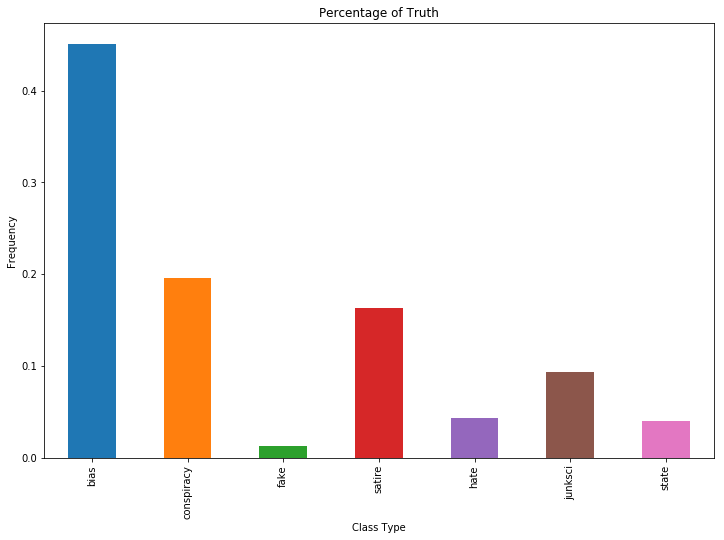

In [121]:
predict_proba = clf.predict_proba(X_test_tfidf)
freq_series = pd.Series.from_array(predict_proba[110,:])

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Percentage of Truth')
ax.set_xlabel('Class Type')
ax.set_ylabel('Frequency')
ax.set_xticklabels(p_data['type'].unique())
plt.show()

#### From the above graph we can see that the 110th article has more weightage of the "bias" type.

# Conclusion

- The data science community is helping to fight against filtering out fake news from social media feeds and other resources with the help of AI.
- Detecting fake news is a classic example of text classification that helps in solving a problem: Can you build a model that can differentiate between “Real” news vs “Fake” news?
- The main goal of the project is to explore feature extraction process manually. Input to the project is a dataset from Kaggle the “Fake news dataset” and contains information about news, article and the type of news. 
- Applied distillation algorithms - Latent Dirichlet Allocation to get more insights and finally add this to the polynomial equation.
- The expected output is a polynomial equation representing topic’s weightage and its score per article. The score for Political affiliation, sentimental analysis, social media activities can help us determine accurately on the factors contributing to fake news.

    ##### Political_affiliation_weight *Political_affiliation_score +  Sentimental_analysis * Sentimental_analysis_score + Topic_modeling_weight * Topic_modeling_score + Social media_weight * Social media_score = Final Score

    ##### Plynomail Equation = 0.3* Sentimental_analysis_score + 0.2* Topic_modeling_score + 0.25* Social media_score + 0.25 * Political_affiliation_score 


- Applied three classification algorithms - Logistic Regression, Naive Bayes Classifier and Random Forest on the overall dataset.
- Calculated accuracy for the above classifications and constructed a confusion matrix.

We intend to understand the data and the process of converting data to numerical features, which in future can be fed to artificial neural networks to predict the type of news article.